# Se√±ales II<a class="anchor" id="s2"></a>
---

# Tabla de contenido

* [Se√±ales II](#s2)
  * [Laplace](#l)
    * [Transformada de Laplace](#tl)
      * [Uso de fracciones parciales en la ecuaci√≥n de transferencia](#U)
      * [Graficaci√≥n](#G)
    * [Transformada Inversa de Laplace](#TI)
    * [Ecuaci√≥n de transferencia ](#edt)
    * [Estabilidad del sistema](#e)
    * [Tabla de Transformadas de Laplace](#ttl)
    * [Tabla de propiedades de la Transformada de Laplace](#tpt)
  * [Filtro pasa bajas](#fpb)
     * [Filtro pasa bajas de primer orden con Python](#fpb1)
     * [Filtro pasa bajas de segundo orden](#fpb2)
  * [ Filtro pasa altas](#fba)
  * [ Filtro pasa banda](#fp)
  * [ Filtro rechaza banda](#fr)
  * [N√∫meros complejos](#nc)
  * [ Transformaci√≥n Z](#TZ)
  * [ Fourier](#F)
     * [ La Transformada de Fourier ](#ltf)
     * [ Funci√≥n de transferecia](#fT)
     * [ Tablas](#T)

---

# Laplace<a class="anchor" id="l"></a>

Usaremos las librer√≠as ya conocidas para esta parte

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sympy as sym

**SymPy** es una biblioteca de matem√°ticas simb√≥licas en Python que permite realizar c√°lculos simb√≥licos, manipulaciones algebraicas, resolver ecuaciones, realizar integraci√≥n y diferenciaci√≥n simb√≥lica, trabajar con expresiones matem√°ticas simb√≥licas y mucho m√°s. Proporciona una amplia gama de funciones y herramientas para trabajar con s√≠mbolos matem√°ticos en lugar de valores num√©ricos.

## Uso de fracciones parciales en la ecuaci√≥n de transferencia <a class="anchor" id="U"></a>
Algunas veces podemos resolver la ecuaci√≥n de transferencia $H(s)$ de un sistema, mediante fracciones parciales. Dependiendo del orden del sistema.

Por ejemplo:
Si tenemos una funci√≥n de transferencia de tipo: $H(S)= \dfrac{1}{(s+1)(s+2)}$

Podemos obtener el valor de los coeficientes, con la siguiente estructura de c√≥digo:

In [4]:
s = sym.Symbol('s')

Hs = 1/((s+1)*(s+2))

<code>**sym.Symbol('s')**</code> crea un s√≠mbolo matem√°tico llamado "s" (o cualquier otra letra) que se puede utilizar para representar variables simb√≥licas en SymPy.

In [5]:
Hs_parcial = sym.apart(Hs,s)

La funci√≥n <code>**sym.apart(Hs, s)**</code> en SymPy se utiliza para descomponer una expresi√≥n racional en fracciones parciales con respecto a una variable simb√≥lica dada.

<br> El primer argumento de la funci√≥n <code>**sym.apart()**</code> es la expresi√≥n racional que se desea descomponer en fracciones parciales, y el segundo argumento especifica la variable con respecto a la cual se realizar√° la descomposici√≥n.

<br> En el codigo tenemos una expresi√≥n racional **Hs** que involucra la variable simb√≥lica **"s"** y que se quiere descomponer en fracciones parciales con respecto a **"s"**

In [6]:
print('H(s):')
sym.pprint(Hs)
print('\n H(s) en  fracciones parciales:')
sym.pprint(Hs_parcial)

H(s):
       1       
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
(s + 1)‚ãÖ(s + 2)

 H(s) en  fracciones parciales:
    1       1  
- ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ + ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  s + 2   s + 1


La funci√≥n <code>**sym.pprint()**</code> en SymPy se utiliza para imprimir de manera m√°s legible y formateada una expresi√≥n matem√°tica o un objeto simb√≥lico en la consola.

In [7]:
#Ejemplo de uso de sym.pprint()
x = sym.Symbol('x')
expr = sym.sin(x) / x

print("Forma normal:")
print(expr)

print("\nForma pretty print:")
sym.pprint(expr)

Forma normal:
sin(x)/x

Forma pretty print:
sin(x)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  x   


## Transformada de Laplace <a class="anchor" id="tl"></a>
 La transformada de Laplace permite simplificar el proceso de soluci√≥n de ecuaciones integro-diferenciales usando operaciones m√°s simples al cambiar desde el dominio del tiempo **'t'** al dominio **'s'**.

Para una se√±al cont√≠nua **x(t)**, la transformada de Laplace esta definida como:

$${ \LARGE X(s) = \int_{-\infty}^{\infty} x(t)e^{-st}dt} $$


Para el caso de se√±ales cont√≠nuas, lineales y causales, se define una se√±al **x(t)** que tiene un componente escal√≥n unitario **Œº(t)**, por lo que la integral se desarrolla de forma unilateral. Se enfatiza que se entiende como transformada de Laplace unilateral si cada se√±al **x(t)** es cero para **t<0**, y es apropiado indicarlo al multiplicar la se√±al por el escal√≥n unitario **Œº(t)**

$${\Large X(s) = \int_{-\infty}^{\infty} x(t)\mu(t)e^{-st}dt =  \int_{0}^{\infty} x(t)\mu(t)e^{-st}dt}$$


Para la transformada de Laplace unilateral, existe una transformada inversa de **X(s)** que es √∫nica. En consecuencia, no hay necesidad de especificar la regi√≥n de convergencia **(ROC)** de forma expl√≠cita. Motivo por el que generalmente no se menciona la ROC para transformadas unilaterales. **(Lathi p337)**.

La se√±al **x(t)** es la inversa de la transformada **X(s)**, que se obtiene de la forma:

$$ {\LARGE x(t) = \dfrac{1}{2 \pi j}\int_{c-\infty}^{c+\infty} x(s)e^{-st}dt}$$


donde **c** es una constante seleccionada para asegurar la convergencia de la integral.

Los pares de ecuaciones conocidos como ¬´Pares de la transformada de Laplace¬ª se escriben de forma simb√≥lica:

$${\LARGE X(s)\Rightarrow \mathscr{L}[x(t)]}$$
<br> $${\LARGE x(t)\Rightarrow \mathscr{L}^{-1}[X(s)]}$$

que tienen algunas propiedades de inter√©s para se√±ales y sistemas como la linealidad,

$${\LARGE \mathscr{L} [a_{1}x_{1}(t) + a_{2}x_{2}(t)] = a_{1}X_{1}(s) + a_{2}X_{2}(s)}$$

Por ejemplo:
Para una se√±al $x(t)=e^{-at}Œº(t)$, encuentre la transformada **X(s)** y su regi√≥n de convergencia **(ROC)**.

$${\LARGE x(t) = e^{-at}\mu(t)}$$

Considerando que **Œº(t)=0** para **t<0** y **Œº(t)=1** para **t‚â•0**:

$$ {\LARGE X(s) = \int_{}^{\infty} e^{-at}e^{-st} \delta t}$$
<br> $$ {\LARGE X(s) = \dfrac{1}{s +a}}$$

Se puede observar que la regi√≥n de convergencia, **ROC**, de **X(s)** es **Re(s)>-a**, como se muestra en la gr√°fica. Para otros valores de s el integral no converge.

Para el ejemplo, siendo **a=2,** se obtiene con el algoritmo el resultado y las gr√°ficas presentadas:

In [8]:
# Ingreso
t = sym.Symbol('t', real=True)
a = sym.Symbol('a', real=True)
s = sym.Symbol('s')
u = sym.Heaviside(t)

Define los s√≠mbolos **t**, **a** y **s** utilizando la funci√≥n <code>**sym.Symbol**</code> de SymPy.

In [9]:
ft = sym.exp(-a*t)*u

Define la funci√≥n de tiempo **ft** utilizando los s√≠mbolos y la funci√≥n escal√≥n <code>**sym.Heaviside.**</code> La funci√≥n **ft** es una funci√≥n exponencial decreciente multiplicada por el escal√≥n de Heaviside.


In [10]:
a_k = 2 # valor de 'a' constante
# Grafica, intervalo tiempo [t_a,t_b]
t_a = -1 ; t_b = 10
muestras = 101  # 51 resolucion grafica

Define un valor constante **a_k** para el par√°metro **a**.

Define los intervalos de tiempo para la gr√°fica y el n√∫mero de muestras.

In [11]:
fts = ft*sym.exp(-s*t) # f(t,s) para integrar
fts = sym.expand(fts)  # expresion de sumas
fts = sym.powsimp(fts) # simplifica exponentes

* La funci√≥n <code>**sym.exp()**</code> es una funci√≥n en SymPy que calcula la funci√≥n exponencial de un argumento dado.<br>
* La funci√≥n <code>**sym.expand()**</code> es una funci√≥n en SymPy que se utiliza para expandir expresiones algebraicas.<br>Cuando se aplica <code>**sym.expand()**</code> a una expresi√≥n algebraica, SymPy trata de simplificar y expandir la expresi√≥n algebraica de la manera m√°s conveniente posible. Esto implica expandir productos y sumas, combinar t√©rminos similares y simplificar la expresi√≥n en general.
* La funci√≥n <code>**sym.powsimp()**</code> es una funci√≥n en SymPy que se utiliza para simplificar exponentes en una expresi√≥n algebraica.<br>Cuando se aplica <code>**sym.powsimp()**</code> a una expresi√≥n, SymPy intenta simplificar los exponentes en la expresi√≥n algebraica. Esto implica aplicar reglas de simplificaci√≥n de exponentes, como combinar exponentes con la misma base o aplicar propiedades de potencias.

In [12]:
# integral Laplace unilateral
Fs_L = sym.integrate(fts,(t,0,sym.oo))
Fs = Fs_L.args[0] # primera ecuacion e intervalo
Fs = Fs[0]        # solo expresion

* La funci√≥n <code>**sym.integrate()**</code> es una funci√≥n de SymPy que se utiliza para realizar la integraci√≥n simb√≥lica de una funci√≥n o expresi√≥n.
<br>Cuando se aplica <code>**sym.integrate(f, var)**</code>, donde **f** es la funci√≥n o expresi√≥n a integrar y **var** es la variable de integraci√≥n, SymPy intenta calcular la integral indefinida de **f** con respecto a la variable **var**.
* En SymPy, el atributo <code>**.args**</code> se utiliza para obtener los argumentos de una expresi√≥n matem√°tica. Devuelve una tupla de los argumentos de la expresi√≥n en el orden en que aparecen.<br>Cuando se aplica .args a una expresi√≥n, SymPy analiza la expresi√≥n y extrae sus componentes individuales como argumentos. Estos componentes pueden ser s√≠mbolos, n√∫meros, operaciones matem√°ticas, funciones, etc.
Por lo tanto en el

En resumen esta parte del codigo calcula la integral de Laplace unilateral de **fts** con respecto a **t** utilizando la funci√≥n <code>**sym.integrate**</code>. Obtiene la expresi√≥n **Fs_L** que representa la transformada de Laplace de **ft** en t√©rminos de **s** y Realiza el procesamiento adicional para extraer la expresi√≥n **Fs** de **Fs_L**.

In [13]:
# polos y ceros en Fs
[P,Q] = Fs.as_numer_denom()
P = sym.poly(P,s)
Q = sym.poly(Q,s)
P_ceros = sym.roots(P)
Q_polos = sym.roots(Q)

* El m√©todo <code>**.as_numer_denom()**</code> se utiliza en SymPy para separar una expresi√≥n matem√°tica en su numerador y denominador. Devuelve una tupla de dos elementos, donde el primer elemento es el numerador y el segundo elemento es el denominador de la expresi√≥n original.
* El m√©todo <code>**sym.poly()**</code> se utiliza en SymPy para crear un objeto de tipo Polinomio a partir de una expresi√≥n algebraica. Toma una expresi√≥n simb√≥lica y la convierte en un polinomio manipulable.
* La funci√≥n <code>**sym.roots()**</code> en SymPy se utiliza para encontrar las ra√≠ces de un polinomio simb√≥lico. Toma un polinomio simb√≥lico como argumento y devuelve un diccionario que contiene las ra√≠ces junto con sus multiplicidades.

En resumen esta parte del codigo encuentra los polos y ceros de **Fs** utilizando las funciones <code>**sym.poly**</code>,<code>**sym.roots**</code> y  guarda los resultados en **P_ceros** y **Q_polos**.

In [14]:
#Ejemplo del uso de sym.poly y sym.roots
x = sym.Symbol('x')
expr = x**2 + 3*x - 2

poly = sym.poly(expr, x)
print("Polinomio:", poly)
print("Grado:", poly.degree())
print("Coeficientes:", poly.all_coeffs())

x = sym.Symbol('y')
expr = x**2 - 4

roots = sym.roots(expr, x)
print("Ra√≠ces:", roots)

Polinomio: Poly(x**2 + 3*x - 2, x, domain='ZZ')
Grado: 2
Coeficientes: [1, 3, -2]
Ra√≠ces: {-2: 1, 2: 1}


In [15]:
print(' dentro de integral f(t)*e(-st):')
sym.pprint(fts)
print('\n expresion F(s):')
sym.pprint(Fs)
print('\n {Q_polos:veces}: ',Q_polos)
print(' {P_ceros:veces}: ',P_ceros)

 dentro de integral f(t)*e(-st):
 -t‚ãÖ(a + s)     
‚ÑØ          ‚ãÖŒ∏(t)

 expresion F(s):
  1  
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
a + s

 {Q_polos:veces}:  {-a: 1}
 {P_ceros:veces}:  {}


Finalmente se imprime la expresi√≥n **fts**, la expresi√≥n **Fs**, los polos en **Q_polos** y los ceros en **P_ceros** utilizando la funci√≥n sym.pprint para obtener una salida formateada y legible.

# Graficaci√≥n<a class="anchor" id="G"></a>

In [16]:
ft = ft.subs(a,a_k)
Fs = Fs.subs(a,a_k)

La funci√≥n <code>**.subs()**</code> se utiliza en SymPy para realizar sustituciones de variables simb√≥licas en expresiones matem√°ticas. Permite reemplazar una variable o una expresi√≥n en una expresi√≥n simb√≥lica por otro valor o expresi√≥n.

Entonces esta parte del codigo sustituye el valor de **a** por **a_k** en la expresi√≥n **ft** y **Fs**.

In [17]:
ti  = np.linspace(t_a,t_b,muestras)
f_t = sym.lambdify(t,ft)
fti = f_t(ti)

la funci√≥n <code>**sym.lambdify**</code> de SymPy se utiliza para convertir una expresi√≥n simb√≥lica en una funci√≥n lambda de Python que se puede evaluar num√©ricamente.

Entonces esta parte del codigo:
* Eval√∫a la funci√≥n **ft** en un intervalo de tiempo definido por **t_a** y **t_b**, generando una serie de puntos de muestra **ti**.
* Convierte la expresi√≥n **ft** en una funci√≥n lambda utilizando <code>**sym.lambdify()**</code>.
* Eval√∫a la funci√≥n lambda en los puntos de muestra **ti** para obtener los valores de **fti**.

In [18]:
[P,Q] = Fs.as_numer_denom()
Q = Q.as_poly(s)
Q_polos = sym.roots(Q)

Obtiene el polinomio del denominador **Q** de **Fs** y encuentra las ra√≠ces de **Q**

In [19]:
s_a = 0 ; s_b = 0
polos = list(Q_polos.keys())
s_a = int(min(s_a,min(polos)))-1
s_b = int(max(s_b,max(polos)))+1

* En Python, el m√©todo <code>**.keys()**</code> se utiliza en los diccionarios para obtener una vista de todas las claves **(keys)** presentes en el diccionario.
* La funci√≥n <code>**list()**</code> en Python se utiliza para crear una lista a partir de un iterable, como una tupla, un conjunto, una cadena de texto o incluso otra lista.
* La funci√≥n <code>**int()**</code> se utiliza para convertir un valor en un entero. Puede recibir diferentes tipos de datos como argumento y devuelve su equivalente entero, si es posible realizar la conversi√≥n.

Entonces esta parte del codigo estima el intervalo para s basado en las ra√≠ces reales encontradas en el paso anterior.

In [20]:
F_s = sym.lambdify(s,Fs)
s_i = np.linspace(s_a,s_b,muestras)
Fsi = F_s(s_i) # Revisar cuando s es complejo

<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (s + 2)**(-1.0)


Convierte la expresi√≥n Fs en una funci√≥n lambda utilizando <code>**sym.lambdify(s)**</code> y eval√∫a la funci√≥n lambda en los puntos del intervalo **s_i** para obtener los valores de **Fsi**.

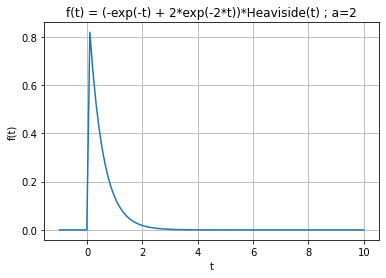

In [72]:
fig_ft, graf_ft = plt.subplots()
plt.plot(ti,fti,label='f(t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('f(t) = '+str(ft)+' ; a='+str(a_k))
plt.grid()


En el contexto del c√≥digo la expresi√≥n <code>**'+str(ft)+'**</code> se utiliza para convertir el objeto **ft** en una cadena de texto y concatenarla con otras cadenas en el contexto de una operaci√≥n de concatenaci√≥n de strings.

La funci√≥n <code>**str()**</code> se utiliza para convertir un objeto en su representaci√≥n de cadena de texto en Python. Al llamar <code>**str(ft)**</code>, est√°s convirtiendo el objeto ft en una cadena de texto.

Luego, el operador <code>**+**</code> se utiliza para concatenar cadenas de texto. En este caso, <code>**'+str(ft)+'**</code> se usa para concatenar la cadena resultante de <code>**str(ft)**</code> con otras cadenas que pueden estar presentes en el c√≥digo.

Esta linea de codigo entonces. Grafica la funci√≥n **f(t)** en funci√≥n del tiempo **t** utilizando los valores de muestra **ti**.

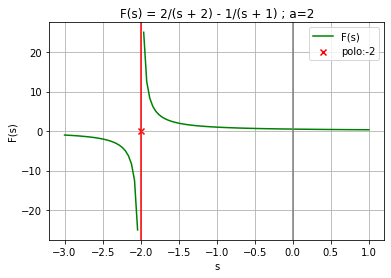

In [76]:
# grafica F(s) , corte en plano real
fig_Fs, graf_Fs = plt.subplots()
plt.plot(s_i,Fsi, color='green',label='F(s)')
for raiz in Q_polos.keys():
    plt.axvline(sym.re(raiz),color='red')
    plt.scatter(sym.re(raiz),sym.im(raiz),label='polo:'+str(raiz),marker='x',color='red')
plt.axvline(0,color='gray')
plt.legend()
plt.xlabel('s')
plt.ylabel('F(s)')
plt.title('F(s) = '+str(Fs)+' ; a='+str(a_k))
plt.grid()
plt.show()

* for raiz in <code>**Q_polos.keys()**</code>:: Itera sobre las claves de los polos en **Q_polos**.
* <code>**plt.axvline(sym.re(raiz), color='red')**</code>: Traza una l√≠nea vertical en el eje x en la posici√≥n correspondiente a la parte real del polo raiz. Esto se hace para visualizar los polos en la gr√°fica.
* <code>**plt.scatter(sym.re(raiz), sym.im(raiz), label='polo:'+str(raiz), marker='x', color='red')**</code>: Traza un marcador en la posici√≥n del polo, utilizando la parte real como coordenada x (sym.re(raiz)) y la parte imaginaria como coordenada y (sym.im(raiz)). El par√°metro label='polo:'+str(raiz) establece la etiqueta del marcador en la leyenda y marker='x' especifica que se utilice una cruz como marcador.
* <code>**plt.axvline(0, color='gray')**</code>: Traza una l√≠nea vertical en el eje x en la posici√≥n 0, para resaltar el eje y facilitar la visualizaci√≥n de la gr√°fica.
* <code>**plt.legend()**</code>: Muestra la leyenda de la gr√°fica, que incluir√° las etiquetas establecidas en las l√≠neas de trazado.

## Transformada Inversa de Laplace <a class="anchor" id="TI"></a>

Se dice que la se√±al **x(t)** es la transformada inversa de Laplace **X(s)** se determina como:

$$ {\LARGE x(t) = \dfrac{1}{2 \pi j}\int_{c-\infty}^{c+\infty}X(s)e^{-st}ds}$$


Donde **c** es una constante seleccionada para asegurar la convergencia de la integral.

La operaci√≥n para encontrar la transformada inversa de Laplace requiere un integral en el plano complejo. El camino de integraci√≥n es a lo largo de c+jœâ, siendo que œâ var√≠a entre $-‚àû\quad a\quad ‚àû$.

Para la se√±al $x(t)=e^{-at}Œº(t)$ es posible si $c>-a$, por ejemplo para un punto $c=1$ con **œâ** desde $-‚àû\quad a\quad ‚àû$. Sin embargo esto requiere aplicar conocimientos en teor√≠a de funciones de variable compleja. Es posible evitar estos ‚Äòdetalles‚Äô usando la tabla de transformadas de Laplace, donde encontrar la transformada inversa consiste en buscar el modelo de expresi√≥n en el domino **‚Äòs‚Äò** y buscar la pareja en el dominio del tiempo **‚Äòt‚Äò**.

La transformada inversa de Laplace con Sympy tiene la instrucci√≥n <code>**sym.inverse_laplace_transform**</code> **(Fs,s,t)**, que para t√©rminos simples, facilita el proceso de desarrollar del integral hacia el dominio del tiempo. Para simplificar los t√©rminos de la expresi√≥n **F(s)** se usan las instrucciones como s<code>ym.expand</code> **(Fs,s)** o para fracciones parciales sym.apart**(Fs,s)**.

In [23]:
# INGRESO
t = sym.Symbol('t', real=True)
s = sym.Symbol('s')

Fs = s/(s**2+3*s+2)

* Define el s√≠mbolo **'t'** como una variable real
*Define el s√≠mbolo **'s'** como una variable simb√≥lica.
* Define la funci√≥n **F(s)** dada en el enunciado.

In [24]:
Fs = sym.sympify(Fs)
Fs = sym.expand_power_exp(Fs)
Fs = sym.expand(Fs,s)

* La funci√≥n <code>**sym.sympify()**</code> en SymPy se utiliza para convertir una expresi√≥n o cadena de texto en un objeto SymPy. Toma como entrada una expresi√≥n matem√°tica en forma de cadena de texto o un objeto SymPy existente y devuelve una versi√≥n simb√≥lica de la expresi√≥n.
* La funci√≥n <code>**sym.expand_power_exp()**</code> en SymPy se utiliza para expandir las expresiones que contienen exponenciales constantes. Toma una expresi√≥n como entrada y busca t√©rminos que involucren exponenciales de la forma a**b, donde a y b son constantes. Luego, expande estos t√©rminos utilizando las reglas de potenciaci√≥n.

In [25]:
if not(Fs.has(sym.exp)):
    Fs = sym.apart(Fs,s)

* El m√©todo <code>**.has()**</code> es utilizado en SymPy para verificar si una expresi√≥n matem√°tica contiene una cierta subexpresi√≥n o caracter√≠stica. Toma como argumento la subexpresi√≥n o caracter√≠stica que se desea verificar y devuelve True si est√° presente en la expresi√≥n y False en caso contrario.
* **if not(Fs.has(sym.exp)): Fs =sym.apart(Fs, s)**: Verifica si la expresi√≥n de F(s) no contiene exponenciales y, en ese caso, aplica la funci√≥n apart() para descomponer la fracci√≥n en fracciones parciales.

In [26]:
ft  = sym.inverse_laplace_transform(Fs,s,t)

<code>**sym.inverse_laplace_transform()**</code> es una funci√≥n de SymPy que se utiliza para calcular la transformada inversa de Laplace de una funci√≥n en el dominio de Laplace. Toma dos argumentos: la funci√≥n en el dominio de Laplace y la variable de Laplace, y devuelve la funci√≥n en el dominio del tiempo.

In [27]:
lista_escalon = ft.atoms(sym.Heaviside)
ft = sym.expand(ft,t) # terminos suma
ft = sym.collect(ft,lista_escalon)

* <code>**.atoms()**</code> es un m√©todo de SymPy que se utiliza para extraer todos los √°tomos de una expresi√≥n simb√≥lica. Un √°tomo en SymPy es un objeto indivisible que no se puede descomponer m√°s. Por ejemplo, variables, constantes, n√∫meros, funciones y operadores son √°tomos.<br>El m√©todo <code>**.atoms()**</code> devuelve un conjunto de todos los √°tomos presentes en la expresi√≥n. Cada √°tomo se representa como un objeto individual en el conjunto.
* El m√©todo <code>**sym.collect()**</code> se utiliza en SymPy para agrupar t√©rminos similares en una expresi√≥n. Toma una expresi√≥n simb√≥lica y la reorganiza en una forma en la que los t√©rminos con variables similares se agrupan juntos.<br>La sintaxis general de <code>**sym.collect()**</code> es la siguiente: <code>**sym.collect(expresion, variable)** </code><br>**expresion**: La expresi√≥n simb√≥lica en la que se desean agrupar los t√©rminos.
<br>**variable**: La variable con respecto a la cual se desea agrupar los t√©rminos.

In [28]:
# SALIDA
print('\n F(s): ')
sym.pprint(Fs)

print('\n f(t): ')
sym.pprint(ft)


 F(s): 
  2       1  
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ - ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
s + 2   s + 1

 f(t): 
‚éõ   -t      -2‚ãÖt‚éû     
‚éù- ‚ÑØ   + 2‚ãÖ‚ÑØ    ‚é†‚ãÖŒ∏(t)




---

# Ecuaci√≥n de transferencia <a class="anchor" id="edt"></a>
La funci√≥n de transferencia de un sistema lineal invariante con el tiempo se define como la transformada de Laplace de la respuesta al impulso, con todas las condiciones iniciales iguales a cero.

\begin{array}{c}
\color{blue}{Dominio\hspace{2mm}del\hspace{2mm}tiempo}\\
\color{blue}{x(t)} & \color{blue}{\rightarrow} & \color{blue}{\fbox{h(t)}} & \color{blue}{\rightarrow} & \color{blue}{y(t)=h(t)*x(t)}\\ 
\downarrow  & & \downarrow & &\uparrow\\
Laplace  & & Laplace & &Laplace\hspace{2mm}inversa\\
\downarrow  & & \downarrow & &\uparrow\\
\color{red}{X(s)} & \color{red}{\rightarrow} & \color{red}{\fbox{H(s)}} & \color{red}{\rightarrow} & \color{red}{Y(s)=H(s)*X(s)}\\ 
\color{red}{Dominio\hspace{2mm}de\hspace{2mm}la\hspace{2mm}frecuencia}\\
\end{array}

Suponga que **H(s)** denota la funci√≥n de transferencia de un sistema con una entrada y una salida, con entrada **x(t)** y salida **y(t)** y respuesta al impulso **h(t)**. Entonces la funci√≥n de transferencia **H(s)** se define como:

$${\LARGE H(s) = \mathscr{L}[h(t)] = \dfrac{P(s)}{Q(s)}}$$

Las propiedades de la funci√≥n de transferencia resumidas son:

1. La funci√≥n de transferencia est√° definida solamente para un sistema lineal invariante con el tiempo. No est√° definida para sistemas no lineales

2. La funci√≥n de transferencia entre una variable de entrada y una variable de salida de un sistema est√° definida como la transformada de Laplace de la respuesta al impulso. Es decir, la funci√≥n de transferencia entre un par de variables de entrada y salida es la relaci√≥n entre la transformada de Laplace de la salida y la transformada de Laplace de la entrada

3. Todas las condiciones iniciales del sistema son iguales a cero.

4. La funci√≥n de transferencia es independiente de la entrada del sistema

5. La funci√≥n de transferencia de un sistema en tiempo cont√≠nuo se expresa solo como una funci√≥n de la variable compleja s. No es funci√≥n de la variable real, tiempo, o cualquier otra variable que se utilice como la variable independiente.


## Estabilidad del sistema
En un sistema acotado (bounded) estable, sometido a una se√±al de entrada en la que se conoce que su salida siempre es la misma, se lo considera un sistema BIBO-estable. (Bounded input, Boundes output)

La funci√≥n de transferencia H(s) de un sistema es una descripci√≥n externa con la forma:

$${\LARGE H(s) = \dfrac{P(s)}{Q(s)}}$$


El polinomio **Q(s)** representa una descripci√≥n interna, en la que si todos los polos de **H(s)** se encuentran en la parte izquierda del plano **(left half plane, LHP)**, todos los t√©rminos **h(t)** son exponenciales decrecientes y **h(t)** es absolutamente integrable. En consecuencia el sistema es BIBO-estable.

Se asume que **H(s)** es una funci√≥n en la que **M ‚â§ N**, siendo **M** el grado de **P(s)** y **N** e grado de **Q(s)**, caso contrario el sistema es es BIBO-inestable.

1. Un sistema LTI CT es asint√≥ticamente estable si y solo si todos los polos de su funci√≥n de transferencia **H(s)** se encuentran en el lado izquierdo del plano, pudiendo ser simples o repetidos.

2. Un sistema LTI CT es inestable si y solo si se dan una o ambas de las condiciones:<br>2.1 Existe al menos un polo de **H(s)** en el lado derecho del plano RHP.<br>2.2 Existen polos repetidos de **H(s)** en el eje imaginario.

3. Un sistema LTI CT es marginalmente estable si y solo si, no hay polos de H(s) en el lado derecho del plano RHP y algunos polos NO repetidos sobre en el eje imaginario (parte Real = 0).

## Tabla de Transformadas de Laplace <a class="anchor" id="ttl"></a>

\begin{array}{|c|c|} \hline
f(t) = \mathscr{L}^{-1}\{F(s)\} & F(s)=\mathscr{L}\{f(t)\}\\ \hline
 1 & \dfrac{1}{s} \\ \hline
 t & \dfrac{1}{s^{2}} \\ \hline
 {t^{n}} & \dfrac{n!}{s^{n+1}}, donde \hspace{2mm}n \hspace{2mm}es\hspace{2mm} un\hspace{2mm} entero\hspace{2mm} positivo \\ \hline
{t^{-1/2}} & \sqrt{\dfrac{œÄ}{s}} \\ \hline
{t^{1/2}} & \dfrac{\sqrt{\pi}}{2s^{3/2}} \\ \hline
{t^{Œ±}} & \dfrac{Œì({Œ±+1})}{s^{a+1}}, \hspace{2mm}{Œ±>-1} \\ \hline
\sin{kt} & \dfrac{k}{s^{2}+k^{2}} \\ \hline
\cos{kt} & \dfrac{s}{s^{2}+k^{2}} \\ \hline
\sin^{2}{kt} & \dfrac{2k^{2}}{s({s^{2}+4k^{2}})} \\ \hline
\cos^{2}{kt} & \dfrac{s^{2}+2k^{2}}{s({s^{2}+4k^{2}})} \\ \hline
 {e^{at}} & \dfrac{1}{s-a} \\ \hline
 \sinh{kt} & \dfrac{k}{s^{2}-k^{2}} \\ \hline
 \cosh{kt} & \dfrac{s}{s^{2}-k^{2}} \\ \hline
 \sinh^{2}{kt} & \dfrac{2k^{2}}{s({s^{2}-4k^{2}})} \\ \hline
 \cosh^{2}{kt} & \dfrac{s^{2}-2k^{2}}{s({s^{2}-4k^{2}})} \\ \hline
 {te^{at}} & \dfrac{1}{(s-a)^{2}} \\ \hline
\end{array}

\begin{array}{|c|c|} \hline
f(t) = \mathscr{L}^{-1}\{F(s)\} & F(s)=\mathscr{L}\{f(t)\}\\ \hline
 t^{n}e^{at} & \dfrac{n!}{(s-a)^{n}}, n \hspace{2mm}es \hspace{2mm}un\hspace{2mm} entero\hspace{2mm} positivo\\ \hline
 e^{at}\sin(kt) & \dfrac{k}{(s-a)^{2}+k^{2}} \\ \hline
 e^{at}\cos(kt) & \dfrac{s-a}{(s-a)^{2}+k^{2}} \\ \hline
 e^{at}\sinh(kt) & \dfrac{k}{(s-a)^{2}-k^{2}} \\ \hline
 e^{at}\cosh (kt) & \dfrac{s-a}{(s-a)^{2}-k^{2}} \\ \hline
 t\sin(kt) & \dfrac{2ks}{(s^{2}+k^{2})^{2}} \\ \hline
 t\cos(kt) & \dfrac{s^{2}-k^{2}}{(s^{2}+k^{2})^{2}} \\ \hline
 \sin(kt)+kt\cos(kt) & \dfrac{2ks^{2}}{(s^{2}+k^{2})^{2}} \\ \hline
 \sin(kt)-kt\cos(kt) & \dfrac{2k^{3}}{(s^{2}+k^{2})^{2}} \\ \hline
 t\sinh(kt) & \dfrac{2ks}{(s^{2}-k^{2})^{2}} \\ \hline
 t\cosh(kt) & \dfrac{s^{2}+k^{2}}{(s^{2}-k^{2})^{2}} \\ \hline
 \dfrac{e^{at}-e^{at}}{a-b} & \dfrac{1}{(s-a)(s-a)} \\ \hline
 \dfrac{ae^{at}-be^{at}}{a-b} & \dfrac{s}{(s-a)(s-a)} \\ \hline
 1-\cos(kt) & \dfrac{k^{2}}{s(s^{2}+k^{2})} \\ \hline
 kt-\sin(kt) & \dfrac{k^{3}}{s(s^{2}+k^{2})} \\ \hline
 \dfrac{kt-a\sin(bt)-b\cos(at)}{ab(a^{2}-b^{2})} & \dfrac{1}{(s^{2}+a^{2})(s^{2}+a^{2})} \\ \hline
\end{array}

## Tabla de propiedades de la Transformada de Laplace<a class="anchor" id="tpt"></a>

#### Tabla de propiedades de la Transformada de Laplace:

\begin{array}{|c|c|} \hline
& {\mathscr{L}[af(t)]=aF(s)} \\ \hline
Linealidad &{\mathscr{L}}\lceil f_{1}(t)+f_{2}(t)\rceil=F_{1}(s)+F_{2}(s)\\ \hline
Desplazamiento \hspace{2mm} en \hspace{2mm} el \hspace{2mm}tiempo & {\mathscr{L}[f(t-{œÑ})u(t-{œÑ})]=e^{-st}F(s)} \\ \hline
Impulso & {\mathscr{L}[{Œ¥}(t)]}=1\\ \hline
Desplazamiento \hspace{2mm} de \hspace{2mm} frecuencia & {\mathscr{L}[e^{-at}f(t)]=F(s+a)} \\ \hline
Derivada & {\mathscr{L}[{\dfrac{df(t)}{dt}}]=sF(s)-f(0)} \\ \hline
Integral  & {\mathscr{L}[\int_{a}^{t}{f(t)dt}]={\dfrac{F(s)}{s}}+{\dfrac{[\int_{a}^{t}{f(t)dt}]_{t=0}}{s}}} \\ \hline
Teorema \hspace{2mm}del\hspace{2mm} valor \hspace{2mm}inicial & {\lim_{t\to0}f(t)}={\lim_{s\to{‚àû}}sF(s)} \\ \hline
Teorema \hspace{2mm} del \hspace{2mm}valor\hspace{2mm} final   & {\lim_{t\to{‚àû}}f(t)={\lim_{s\to0}}sF(s)} \\ \hline  
Tiempo \hspace{2mm}por \hspace{2mm}una \hspace{2mm}funcion    & {\mathscr{L}[tf(t)]={\dfrac{-dF(s)}{ds}}}   donde  F(s)={\mathscr{L}[f(t)]} \\ \hline
& {\mathscr{L}[f(at)]={\dfrac{1}{a}}F{\left(\dfrac{s}{a}\right)}} \\ \hline
&{\mathscr{L}[t^{n}f(t)]=(-1)^{n}{\dfrac{d^{n}F(s)}{ds^{n}}}}\\ \hline
& {\mathscr{L}[f({\dfrac{t}{a}})]=aF(as)}\\ \hline
& {\mathscr{L}[{\dfrac{f(t)}{t}]={\int_{s}^{‚àû}}F(s)ds}}\\ \hline
\end{array}

#### Pares de Transformadas de Laplace:

\begin{array}{|c|c|} \hline
f(t)  & F(s)\\ \hline
 1 \hspace{2mm} Impulso \hspace{2mm} unitario & 1 \\ \hline
 a(t)\hspace{2mm} Ecal√≥n \hspace{2mm} unitario & \dfrac{1}{s}\\ \hline
 a \hspace{2mm} Ecal√≥n & \dfrac{a}{s} \\ \hline
at\hspace{2mm} Rampa & \dfrac{a}{s^{2}} \\ \hline
 e^{\pm at} Exponencial &\dfrac{1}{s\pm a} \\ \hline
 \sin (\omega t) Seno & \dfrac{\omega}{s^{2} + \omega^{2}} \\ \hline
 \cos (\omega t) Coseno &\dfrac{s}{s^{2} + \omega^{2}}\\ \hline
 e^{-at}\sin (\omega t) \hspace{2mm}seno \hspace{2mm}amortiguado & \dfrac{\omega}{(s+a)^{2} + \omega^{2}}\\ \hline
 e^{-at}\cos (\omega t) \hspace{2mm} coseno \hspace{2mm} amortiguado & \dfrac{s+a}{(s+a)^{2} + \omega^{2}} \\ \hline
 t^{n} & \dfrac{n!}{s^{n+1}} \\ \hline
 t^{n}e^{at} & \dfrac{n!}{(s+a)^{n+1}} \\ \hline
 t\cos(\omega t) & \dfrac{s^{2}-\omega ^{2}}{(s^{2}+\omega ^{2})^2}\\ \hline
 \dfrac{t}{2\omega}\sin(\omega t) & \dfrac{s}{(s^{2}+\omega ^{2})^2} \\ \hline
 \dfrac{t^{n-1}}{(n-1)!} & \dfrac{1}{s^{n}} \\ \hline
 \dfrac{t^{n-1}e^{\pm at}}{(n-1)!} \hspace{2mm} Rampa \hspace{2mm}amortiguada & \dfrac{1}{(s \pm a)^{n}}\\ \hline
\dfrac{1}{a}(1-e^{-at}) & \dfrac{1}{s(s+a)} \\ \hline
 \dfrac{1}{a^{2}}(at-1+e^{-at}) & \dfrac{1}{s^{2}(s+a)}\\ \hline
 \dfrac{1}{b-a}(e^{-at}-e^{-bt}) & \dfrac{1}{(s+a)(s+b)} \\ \hline
 \frac{1}{ab}\lceil1+\dfrac{1}{a-b}(be^{-at}-ae^{-bt})\rceil & \dfrac{1}{s(s+a)(s+b)} \\ \hline
 \sin{\omega t} & \dfrac{\omega}{s^{2}+\omega^{2}} \\ \hline
 \cos{\omega t} & \dfrac{s}{s^{2}+\omega^{2}} \\ \hline  
\end{array}






# Filtro pasa bajas <a class="anchor" id="fpb"></a>
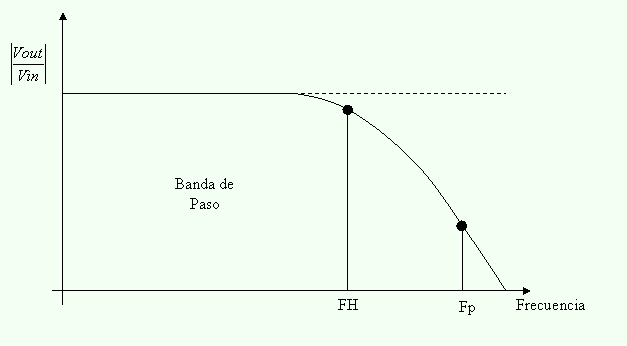

Imagen tomada de la siguiente referencia: Filtro pasa bajas. (n.d.). https://lc.fie.umich.mx/~jfelix/InstruII/PB/PB.htm

Un filtro pasa bajas permite el paso de una banda especifica de frecuencias

Esta banda de frecuencias es llamada banda de paso, en el caso del filtro pasa bajas, esta frecuencia es desde DC (cero hertz.) hasta una frecuencia FH

En frecuencias superiores a FH, se tiene una atenuaci√≥n en el voltaje de salida, pero a una frecuencia especificada como FS, definida como banda de paro, debe de existir una atenuaci√≥n m√≠nima.

La banda de frecuencias mayores a FS es llamada banda de paso.

La banda de frecuencias entre FH y FS es conocida como banda de transici√≥n.

Existen filtros pasa bajas activos y pasivos, de primer orden y segundo orden, de tipo RC y RL, asi como de mayor orden y RCL, sin embargo ese tipo de filtros los abordaremos m√°s adelante en el curso, por ahora nos interesa conocer el comportamiento de un filtro pasa bajas, para que sirven y como podemos programarlos en Python.

## Filtro pasa bajas de primer orden con Python<a class="anchor" id="fpb1"></a>
$${\LARGE H(s) = \dfrac{1}{s+1}}$$

A continuaci√≥n, veremos un c√≥digo en el cual podemos observar la programaci√≥n en Python de un filtro pasa bajas de primer orden.

Este c√≥digo utiliza la biblioteca ipywidgets para crear una interfaz interactiva en Jupyter Notebook. La interfaz permite ajustar el par√°metro wc mediante un deslizador y visualizar la respuesta en frecuencia de un sistema.

El c√≥digo se divide en las siguientes secciones:

1. Importaci√≥n de bibliotecas: Se importan las bibliotecas necesarias, incluyendo ipywidgets, numpy y matplotlib.pyplot.

2. Definici√≥n de la clase respuesta_f: Se define una clase llamada respuesta_f que tiene m√©todos para calcular y trazar la respuesta en frecuencia de un sistema. El constructor __init__ inicializa los par√°metros necesarios, como la frecuencia de muestreo SR y la frecuencia m√°xima w_max. El m√©todo set_Hs se utiliza para calcular la respuesta en frecuencia del sistema dado los valores de Y y X. Los m√©todos plot_mag y plot_phase trazan la magnitud y la fase de la respuesta en frecuencia, respectivamente.

3. Definici√≥n de funciones interactivas: Se definen dos funciones interactivas utilizando el decorador @widgets.interact. Cada funci√≥n tiene un argumento wc que representa la frecuencia de corte. Dentro de cada funci√≥n, se crea una instancia de la clase respuesta_f y se calcula la respuesta en frecuencia del sistema utilizando el m√©todo set_Hs. Luego, se traza la magnitud o la fase de la respuesta en frecuencia utilizando los m√©todos plot_mag o plot_phase, respectivamente.

4. Configuraci√≥n de la interfaz: Se establece el rango de valores para el par√°metro wc mediante el argumento (1, 100) en el decorador @widgets.interact. Esto crea un deslizador que permite ajustar el valor de wc dentro de ese rango.

Al ejecutar el c√≥digo en Jupyter Notebook, se mostrar√°n dos interfaces interactivas. La primera permite ajustar wc y visualizar la magnitud de la respuesta en frecuencia del sistema. La segunda permite ajustar wc y visualizar la fase de la respuesta en frecuencia del sistema. Al mover el deslizador, la respuesta en frecuencia se actualiza en tiempo real y se actualiza la visualizaci√≥n correspondiente. Esto permite explorar c√≥mo cambia la respuesta en frecuencia del sistema a medida que se ajusta el par√°metro wc.

In [29]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
%matplotlib inline


class respuesta_f:
    def __init__(self, w_max=1000):
        SR         = 5
        self.w_max = w_max
        self.w     = np.arange(1, SR*w_max)/SR
    #
    def set_Hs(self, Y, X):
        self.Hs = Y/X
    #
    @staticmethod
    def plot_mag(H, w, color='orange'):
        M_dB = 20*np.log10(np.abs(H))
        #
        plt.figure('Magnitud [dB]', figsize=(12, 6))
        plt.semilogx(w, M_dB, color, linewidth=3)
        plt.grid(True)
        #plt.show()

    @staticmethod
    def plot_phase(H, w, color='blue'):
        angle = np.angle(H, deg=True)
        #
        plt.figure('Fase [¬∞]', figsize=(12, 7))
        plt.semilogx(w, angle, color, linewidth=3)
        plt.grid(True)
        #plt.show()

w_max = 100000
@widgets.interact(wc=(1, 100))
def magnitud(wc=1):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = wc
    Xs = s + wc
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)

@widgets.interact(wc=(1, 100))
def fase(wc=1):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = wc
    Xs = s + wc
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_phase(h1.Hs, h1.w)

interactive(children=(IntSlider(value=1, description='wc', min=1), Output()), _dom_classes=('widget-interact',‚Ä¶

interactive(children=(IntSlider(value=1, description='wc', min=1), Output()), _dom_classes=('widget-interact',‚Ä¶

## Filtro pasa bajas de segundo orden<a class="anchor" id="fpb2"></a>

$${\LARGE H(s)= \dfrac{{\omega^{2}_{o}}}{s^{2}+\dfrac{{\omega}_{o}}{Q}s+{\omega^{2}_{o}}}}$$

Como habiamos visto anteriormente,este c√≥digo utiliza la biblioteca ipywidgets para crear interfaces interactivas en Jupyter Notebook. Las interfaces permiten ajustar los par√°metros wc y eps mediante deslizadores y visualizar la respuesta en frecuencia de un sistema.

El c√≥digo se divide en tres partes, cada una con una funci√≥n interactiva diferente:

1. Funci√≥n magnitud: Esta funci√≥n muestra la magnitud de la respuesta en frecuencia de un sistema. El par√°metro wc representa la frecuencia de corte y se puede ajustar mediante un deslizador en el rango de 1 a 100. La funci√≥n crea una instancia de la clase respuesta_f con un valor m√°ximo de frecuencia w_max. Luego, se calcula la respuesta en frecuencia del sistema utilizando los valores de wc. Finalmente, se traza la magnitud de la respuesta en frecuencia utilizando el m√©todo plot_mag de la clase respuesta_f.

2. Funci√≥n magnitud con eps: Esta funci√≥n es similar a la anterior, pero tiene un par√°metro adicional eps. El par√°metro eps representa una cantidad de amortiguamiento y tambi√©n se puede ajustar mediante un deslizador en el rango de 0.01 a 3. La funci√≥n crea una instancia de la clase respuesta_f con un valor m√°ximo de frecuencia w_max. Luego, se calcula la respuesta en frecuencia del sistema utilizando los valores de wc y eps. Finalmente, se traza la magnitud de la respuesta en frecuencia utilizando el m√©todo plot_mag de la clase respuesta_f.

3. Funci√≥n fase: Esta funci√≥n muestra la fase de la respuesta en frecuencia de un sistema. Tiene los mismos par√°metros wc y eps que la funci√≥n anterior. La funci√≥n crea una instancia de la clase respuesta_f con un valor m√°ximo de frecuencia w_max. Luego, se calcula la respuesta en frecuencia del sistema utilizando los valores de wc y eps. Finalmente, se traza la fase de la respuesta en frecuencia utilizando el m√©todo plot_phase de la clase respuesta_f.

Al ejecutar el c√≥digo en Jupyter Notebook, se mostrar√°n tres interfaces interactivas. La primera permite ajustar wc y visualizar la magnitud de la respuesta en frecuencia del sistema. La segunda tambi√©n permite ajustar wc y eps, y visualiza la magnitud de la respuesta en frecuencia. La tercera permite ajustar wc y eps, y visualiza la fase de la respuesta en frecuencia. Al mover los deslizadores, la respuesta en frecuencia se actualizar√° en tiempo real y se actualizar√° la visualizaci√≥n correspondiente. Esto permite explorar c√≥mo cambia la respuesta en frecuencia del sistema al ajustar los par√°metros wc y eps.


In [30]:
w_max = 350_000
@widgets.interact(wc=(1, 100))
def magnitud(wc=1):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = wc**2
    Xs = s**2 + 0.5*s + wc**2
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)

w_max = 350_000
@widgets.interact(wc=(1, 100), eps=(0.01, 3))
def magnitud(wc=1, eps=0.5):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = wc**2
    Xs = s**2 + 2*wc*eps*s + wc**2
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)

w_max = 350_000
@widgets.interact(wc=(1, 100), eps=(0.01, 3))
def fase(wc=1, eps=0.5):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = wc**2
    Xs = s**2 + 2*wc*eps*s + wc**2
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_phase(h1.Hs, h1.w)

interactive(children=(IntSlider(value=1, description='wc', min=1), Output()), _dom_classes=('widget-interact',‚Ä¶

interactive(children=(IntSlider(value=1, description='wc', min=1), FloatSlider(value=0.5, description='eps', m‚Ä¶

interactive(children=(IntSlider(value=1, description='wc', min=1), FloatSlider(value=0.5, description='eps', m‚Ä¶

# Filtro pasa altas <a class="anchor" id="fba"></a>
Permite el paso de frecuencias mayores que una frecuencia baja (FL)

Todo filtro pasa altas tiene una frecuencia de corte superior, debido a que ning√∫n dispositivo realizable f√≠sicamente puede tener un ancho de banda infinita. Por esto se considera a un filtro pasa altas a un dispositivo que deja pasar un rango de frecuencias para la aplicaci√≥n espec√≠fica (No se confunda con el filtro pasa banda)


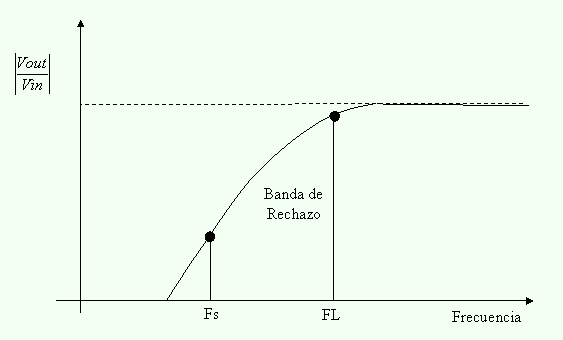

Imagen tomada de la siguiente referencia: Filtro pasa bajas. (n.d.). https://lc.fie.umich.mx/~jfelix/InstruII/PB/PB.htm

Este c√≥digo utiliza la biblioteca ipywidgets para crear una interfaz interactiva en Jupyter Notebook que permite ajustar los par√°metros de un filtro y visualizar su respuesta en frecuencia.

El c√≥digo define dos funciones interactivas: magnitud y fase. Ambas funciones est√°n anotadas con el decorador @widgets.interact, lo que indica que se deben generar controles interactivos para los par√°metros especificados.

En la funci√≥n magnitud, se crea una instancia de la clase respuesta_f con un valor m√°ximo de frecuencia w_max. Luego, se calculan los valores de Ys y Xs que definen la funci√≥n de transferencia del filtro. Estos valores dependen de los par√°metros wc y eps, que se especifican en los controles interactivos. Finalmente, se llama al m√©todo est√°tico plot_mag de la clase respuesta_f para trazar el gr√°fico de magnitud de la respuesta en frecuencia.

La funci√≥n fase sigue un proceso similar. Se crea una instancia de respuesta_f, se calculan los valores de Ys y Xs y se llama al m√©todo plot_phase para trazar el gr√°fico de fase de la respuesta en frecuencia.

En resumen, este c√≥digo crea una interfaz interactiva para ajustar los par√°metros de un filtro y visualizar su respuesta en frecuencia en t√©rminos de magnitud y fase. Los controles interactivos permiten explorar diferentes configuraciones del filtro y observar su efecto en la respuesta.

In [31]:
w_max = 350_000
@widgets.interact(wc=(1, 100), eps=(0.01, 3))
def magnitud(wc=10, eps=0.6):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = (wc*s)**2
    Xs = s**2 + 2*wc*eps*s + wc**2
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)

w_max = 350_000
@widgets.interact(wc=(1, 100), eps=(0.01, 3))
def fase(wc=10, eps=0.6):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = (wc*s)**2
    Xs = s**2 + 2*wc*eps*s + wc**2
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_phase(h1.Hs, h1.w)

interactive(children=(IntSlider(value=10, description='wc', min=1), FloatSlider(value=0.6, description='eps', ‚Ä¶

interactive(children=(IntSlider(value=10, description='wc', min=1), FloatSlider(value=0.6, description='eps', ‚Ä¶

# Filtro pasa banda <a class="anchor" id="fp"></a>
Los filtros pasa banda obedecen a la siguiente estructura de ecuaci√≥n de transferencia:


$${\LARGE H(s)= \dfrac{\dfrac{{\omega}_{o}}{Q}s}{s^{2}+\dfrac{{\omega}_{o}}{Q}s+{\omega^{2}_{o}}}}$$

Permite el paso de una banda especifica de frecuencias y rechaza a todas las dem√°s
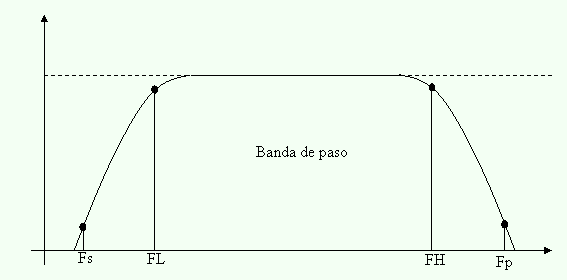
Imagen tomada de la siguiente referencia: Filtro pasa bajas. (n.d.). https://lc.fie.umich.mx/~jfelix/InstruII/PB/PB.htm

Este c√≥digo tambi√©n utiliza la biblioteca ipywidgets para crear una interfaz interactiva en Jupyter Notebook. En este caso, se definen dos funciones interactivas: magnitud y fase.

La funci√≥n magnitud tiene tres par√°metros interactivos: wc_1, wc_2 y eps. Estos par√°metros determinan los valores utilizados para calcular los valores de Ys y Xs que definen la funci√≥n de transferencia del filtro. La funci√≥n crea una instancia de la clase respuesta_f con un valor m√°ximo de frecuencia w_max, y luego utiliza los par√°metros proporcionados para calcular los valores correspondientes de Ys y Xs. Finalmente, llama al m√©todo est√°tico plot_mag de la clase respuesta_f para trazar el gr√°fico de magnitud de la respuesta en frecuencia.

La segunda funci√≥n interactiva, fase, sigue un proceso similar, pero en lugar de llamar al m√©todo plot_mag, llama al m√©todo plot_phase para trazar el gr√°fico de fase de la respuesta en frecuencia.

En resumen, este c√≥digo crea una interfaz interactiva que permite ajustar los par√°metros de un filtro y visualizar su respuesta en frecuencia en t√©rminos de magnitud y fase. Los controles interactivos permiten explorar diferentes configuraciones del filtro y observar su efecto en la respuesta.

In [32]:
w_max = 10000
@widgets.interact(wc_1=(.1, 10), wc_2=(30, 100), eps=(0.01, 3))
def magnitud(wc_1=1, wc_2=50, eps=1):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Wo =  wc_1*wc_2
    B  = wc_2 - wc_1
    Ys = s
    Xs = s**2 + eps*B*s + Wo
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)

w_max = 350_000
@widgets.interact(wc_1=(1, 100), wc_2=(1, 100), eps=(0.01, 3))
def magnitud(wc_1=58, wc_2=62, eps=1):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Wo =  wc_1*wc_2
    B  = wc_2 - wc_1
    Ys = s
    Xs = s**2 + eps*B*s + Wo
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_phase(h1.Hs, h1.w)

interactive(children=(FloatSlider(value=1.0, description='wc_1', max=10.0, min=0.1), IntSlider(value=50, descr‚Ä¶

interactive(children=(IntSlider(value=58, description='wc_1', min=1), IntSlider(value=62, description='wc_2', ‚Ä¶

# Filtro rechaza banda <a class="anchor" id="fr"></a>

Los filtros rechaza banda obedecen a la siguiente estructura en su ecuaci√≥n de transferencia:

$${\LARGE H(s)= \dfrac{{\omega}_{o}^{2}+s^{2}}{s^{2}+\dfrac{{\omega}_{o}}{Q}s+{\omega^{2}_{o}}}}$$

Permite el paso de todas las se√±ales a excepci√≥n de las de una banda, las cuales son rechazadas.

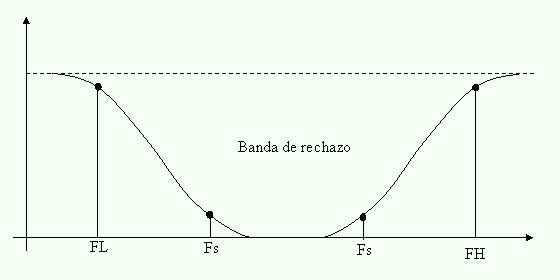
Imagen tomada de la siguiente referencia: Filtro pasa bajas. (n.d.). https://lc.fie.umich.mx/~jfelix/InstruII/PB/PB.htm

Este c√≥digo tambi√©n utiliza la biblioteca ipywidgets para crear una interfaz interactiva en Jupyter Notebook. En este caso, se definen dos funciones interactivas: magnitud.

La funci√≥n magnitud tiene tres par√°metros interactivos: wc_1, wc_2 y eps. Estos par√°metros determinan los valores utilizados para calcular los valores de Ys y Xs que definen la funci√≥n de transferencia del filtro. La funci√≥n crea dos instancias de la clase respuesta_f con diferentes valores m√°ximos de frecuencia w_max y luego utiliza los par√°metros proporcionados para calcular los valores correspondientes de Ys y Xs en cada instancia. Finalmente, llama al m√©todo est√°tico plot_mag de la clase respuesta_f para trazar el gr√°fico de magnitud de la respuesta en frecuencia para ambas instancias, mostrando diferentes colores para cada gr√°fico.

En resumen, este c√≥digo crea una interfaz interactiva que permite ajustar los par√°metros de dos filtros y visualizar su respuesta en frecuencia en t√©rminos de magnitud. Los controles interactivos permiten explorar diferentes configuraciones de los filtros y observar su efecto en la respuesta. Se comparan las respuestas de dos filtros con diferentes caracter√≠sticas (diferentes valores de wc_1, wc_2 y eps) para analizar sus diferencias en el dominio de la magnitud de la respuesta en frecuencia.

In [33]:
w_max = 350_000
@widgets.interact(wc_1=(1, 100), wc_2=(1, 100), eps=(0.01, 3))
def magnitud(wc_1=58, wc_2=62, eps=1):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Wo =  wc_1*wc_2
    Ys = s**2 + Wo
    Xs = s**2 + eps*np.sqrt(Wo)*s + Wo
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)

w_max = 2000
@widgets.interact(wc_1=(1, 100), wc_2=(1, 100), eps=(0.01, 3))
def magnitud(wc_1=58, wc_2=62, eps=1):
    h1 = respuesta_f(w_max)
    h2 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Wo =  wc_1*wc_2
    Ys = s**2 + Wo
    Xs = s**2 + eps*np.sqrt(Wo)*s + Wo
    h1.set_Hs(Ys, Xs)
    #
    B  = wc_2 - wc_1
    Xs = s**2 + B*s + Wo
    h2.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)
    respuesta_f.plot_mag(h2.Hs, h2.w, color='green')

interactive(children=(IntSlider(value=58, description='wc_1', min=1), IntSlider(value=62, description='wc_2', ‚Ä¶

interactive(children=(IntSlider(value=58, description='wc_1', min=1), IntSlider(value=62, description='wc_2', ‚Ä¶



---
# N√∫meros complejos <a class="anchor" id="nc"></a>

En Python, puedes trabajar con n√∫meros complejos utilizando la biblioteca NumPy, que proporciona una serie de funciones y m√©todos para operar con n√∫meros complejos de manera eficiente.

En este ejemplo, utilizamos la funci√≥n <code>**complex()**</code> para crear un n√∫mero complejo z con partes real e imaginaria. Luego, utilizamos los m√©todos **real** e **imag** para acceder a las partes real e imaginaria respectivamente.

Tambi√©n podemos utilizar las funciones <code>**np.abs()**</code> y <code>**np.angle()**</code> para calcular el m√≥dulo y el argumento de un n√∫mero complejo.

Adem√°s de estas funciones b√°sicas, NumPy proporciona muchas otras funciones para realizar operaciones matem√°ticas con n√∫meros complejos, como suma, resta, multiplicaci√≥n, exponenciaci√≥n, entre otras

In [34]:
# Crear un n√∫mero complejo
z = complex(3, 4)
print("N√∫mero complejo:", z)

# Acceder a las partes real e imaginaria
print("Parte real:", z.real)
print("Parte imaginaria:", z.imag)

# Calcular el m√≥dulo y el argumento
mod = np.abs(z)
arg = np.angle(z)

print("M√≥dulo:", mod)
print("Argumento (en radianes):", arg)

N√∫mero complejo: (3+4j)
Parte real: 3.0
Parte imaginaria: 4.0
M√≥dulo: 5.0
Argumento (en radianes): 0.9272952180016122


En este ejemplo, utilizamos las funciones <code>**np.add()**</code>, <code>**np.subtract()**</code>, <code>**np.multiply()**</code> y <code>**np.divide()**</code> para realizar la suma, resta, multiplicaci√≥n y divisi√≥n de n√∫meros complejos respectivamente.

NumPy tambi√©n proporciona otras funciones √∫tiles, como <code>**np.conj()**</code> para calcular la conjugaci√≥n de un n√∫mero complejo, <code>**np.exp()**</code> para calcular la exponenciaci√≥n de un n√∫mero complejo, y muchas m√°s.

In [35]:
z1 = complex(2, 3)
z2 = complex(1, 2)

# Suma de n√∫meros complejos
suma = np.add(z1, z2)
print("Suma de n√∫meros complejos:", suma)

# Resta de n√∫meros complejos
resta = np.subtract(z1, z2)
print("Resta de n√∫meros complejos:", resta)

# Multiplicaci√≥n de n√∫meros complejos
multiplicacion = np.multiply(z1, z2)
print("Multiplicaci√≥n de n√∫meros complejos:", multiplicacion)

# Divisi√≥n de n√∫meros complejos
division = np.divide(z1, z2)
print("Divisi√≥n de n√∫meros complejos:", division)

# Crear un n√∫mero complejo
z = complex(3, 4)

# Calcular el conjugado
conjugado = np.conj(z)

print("N√∫mero complejo original:", z)
print("Conjugado:", conjugado)

# Crear un n√∫mero complejo
z = complex(1, 1)

# Calcular la exponenciaci√≥n
exponenciacion = np.exp(z)

print("N√∫mero complejo original:", z)
print("Exponenciaci√≥n:", exponenciacion)

Suma de n√∫meros complejos: (3+5j)
Resta de n√∫meros complejos: (1+1j)
Multiplicaci√≥n de n√∫meros complejos: (-4+7j)
Divisi√≥n de n√∫meros complejos: (1.6-0.2j)
N√∫mero complejo original: (3+4j)
Conjugado: (3-4j)
N√∫mero complejo original: (1+1j)
Exponenciaci√≥n: (1.4686939399158851+2.2873552871788423j)


 Explicaci√≥n paso a paso del c√≥digo que grafica los n√∫meros complejos:

 1. Creamos una lista de n√∫meros complejos

Se crea una lista llamada **z** que contiene cuatro n√∫meros complejos. Puedes modificar esta lista y agregar tus propios n√∫meros complejos.

In [36]:
z = [2 + 3j, -1 + 2j, 4 - 1j, -2 - 2j]

2. Obtenemos las partes reales e imaginarias de cada n√∫mero complejo

Se crear una lista real que contiene las partes reales de cada n√∫mero complejo en la lista z, y una lista imag que contiene las partes imaginarias correspondientes.

In [37]:
real = [num.real for num in z]
imag = [num.imag for num in z]

3. Creamos el gr√°fico

Utilizamos la funci√≥n <code>**plt.scatter()**</code> de Matplotlib para crear el gr√°fico de dispersi√≥n. Pasamos las listas **real** y **imag** como argumentos para especificar las coordenadas x e y de los puntos respectivamente. El par√°metro <code>**color='red'**</code> se utiliza para definir el color de los puntos.

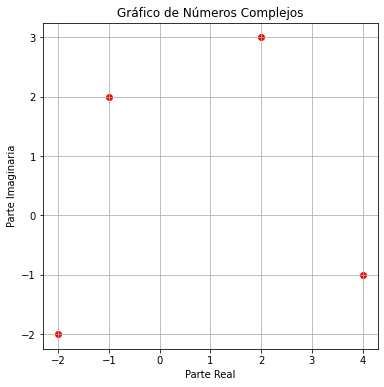

In [38]:
plt.figure(figsize=(6, 6))
plt.scatter(real, imag, color='red')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Gr√°fico de N√∫meros Complejos')
plt.grid(True)
plt.show()

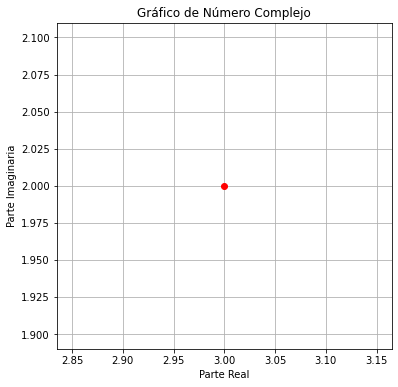

In [39]:
# Se puede hacer tambien de esta manera
# Crear un n√∫mero complejo
z = complex(3, 2)

# Obtener las partes real e imaginaria
real = z.real
imag = z.imag

# Crear el gr√°fico
plt.figure(figsize=(6, 6))
plt.plot(real, imag, 'ro')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Gr√°fico de N√∫mero Complejo')
plt.grid(True)
plt.show()

In [40]:
# Definici√≥n de funciones
#resalte de ejes x, y
def ptl_format_cartesian(x=0, y=0):
    plt.grid('on')
    plt.axvline(x, linewidth=3, color='black')
    plt.axhline(y, linewidth=3, color='black')
    plt.plot([x],[y], 'o', color='black', markersize=8)

#aspecto iguan en plano complejo
def plt_format_complex(a=-1.5, b=1.5):
    plt.axes().set_aspect('equal')
    plt.xlim( [a, b] )
    plt.ylim( [a, b] )
    plt.axvline(0, linewidth=3, color='black')
    plt.axhline(0, linewidth=3, color='black')
    plt.plot([0],[0], 'o', color='black', markersize=8)
    plt.grid('on')

---

## Problemas que dan origen a los n√∫meros complejos
¬øCu√°les son las soluciones de la ecuaci√≥n $x^{3}+x=0$?

Al factorizar
 $$x^{3}+x=0$$
<br> $$= x(x^{2}+1),$$

lo que implica $x = 0$ y $x^{2}=1$
 y

**Actividad:** Graficar $f(x) = x^{3}+ x$ en $x \in [-2, 2]$
 considerando una resoluci√≥n de $0.1$

In [41]:
a, b, res = -2, 2, 0.01
#
steps = (b-a)/res
x     = np.linspace(a, b, int(steps))
y     = x**3 + 1

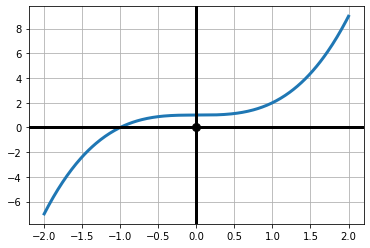

In [42]:
plt.figure(figsize=(8, 8))
plt.close()
plt.figure()
plt.plot(x, y,
         linewidth=3)
ptl_format_cartesian(0, 0)
plt.show()

Graficando las factorizaciones $y_{0}=x$, $y_{1}=x^{2}+1$

<Figure size 576x576 with 0 Axes>

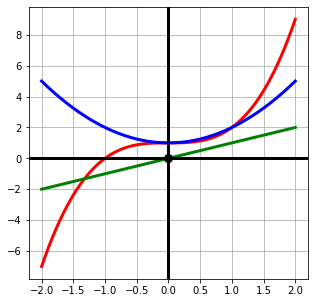

In [43]:
y0 = x
y1 = x**2 + 1

plt.figure(figsize=(8, 8))
plt.figure(figsize=(5,5))
plt.plot(x, y , color='red'  , linewidth=3)
plt.plot(x, y0, color='green', linewidth=3)
plt.plot(x, y1, color='blue' , linewidth=3)
ptl_format_cartesian(0, 0)
plt.show()

**Actividad**: Buscar la soluci√≥n anal√≠tica

A partir de la siguiente igualdad $x^{3}+x =x^{3}+0x^{2}+x+0 $
 se puede uilizar la funci√≥n <code>np.poly1d</code>.

In [44]:
p = np.poly1d([1, 0, 1, 0])

print(f"El polinomio es:\n{np.poly1d(p)}")

El polinomio es:
   3
1 x + 1 x


A partir de dicha definici√≥n se pueden extraer las ra√≠ces

In [45]:
for r in p.r:
    print(r)

(-0+1j)
-1j
0j


## Conclusi√≥n
Los n√∫meros complejos **s√≠ existen** y no son derivados de propiedades geom√©tricas o de cuentas, es decir, son entes completamente abstractos. Son una extensi√≥n de los n√∫meros reales $\mathbb R$ qu√© es necesaria, como en este ejemplo, para la resoluci√≥n de ecuaciones. En las siguientes secciones se discutiran propiedades de los n√∫meros complejos que son √∫tiles para nuestros prop√≥sitos en filtrado y en general para an√°lisis de sistemas.


---
## Propiedades de los n√∫meros complejos
### Periodicidad
#### Ejemplo 1
Se define el n√∫mero complejo $j$ y se grafica en el plano complejo $\mathbb{C}=\mathbb R x \mathbb I$

In [46]:
c = 1j
print(c)

1j


In [47]:
c2 = c**2
c3 = c**3
c4 = c**4

print(f"c   = {c}")
print(f"c^2 = {c2}")
print(f"c^3 = {c3}")
print(f"c^4 = {c4}")

c   = 1j
c^2 = (-1+0j)
c^3 = (-0-1j)
c^4 = (1+0j)


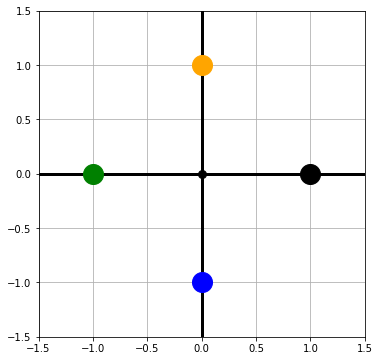

In [48]:
plt.figure(figsize=(8, 8))
plt.close()
plt.figure(figsize=(6,6))
plt_format_complex()
plt.plot(c .real, c .imag, 'o', color='orange', markersize=20)
plt.plot(c2.real, c2.imag, 'o', color='green' , markersize=20)
plt.plot(c3.real, c3.imag, 'o', color='blue'  , markersize=20)
plt.plot(c4.real, c4.imag, 'o', color='black' , markersize=20)
plt.show()

## Representaci√≥n polar de los n√∫meros complejos.


Sea $c = a+jb$, un n√∫mero complejo dado en coordenadas cartesianas $(x,y) \in \mathbb R x \mathbb I$
. Este n√∫mero puede representarse en coordenadas polares $(r, \theta)$, donde es la distancia de entre el punto $c$ y el origen del sistema coordenado y $\theta$ el √°ngulo en radianes entre y la horizontal:

$$r = \sqrt{a^{2}+b^{2}}$$  

$$\theta = \arctan \left(\dfrac{b}{a} \right)$$ 

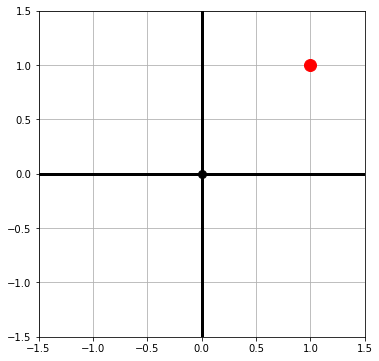

In [49]:
c = 1+1j
#
plt.figure(figsize=(8, 8))
plt.close()
plt.figure(figsize=(6,6))
plt_format_complex()
plt.plot( c.real, c.imag, 'or', markersize=12)
plt.show()

In [50]:
print(c)
r_np, ang_np = np.absolute(c),  np.angle(c)
r_sc, ang_sc = np.sqrt(c.real**2 + c.imag**2),  np.arctan(c.imag/c.real)
print(f"mag(c) = {r_np:5.3f}, ang(c) = {ang_np:5.3f}")
print(f"mag(c) = {r_sc:5.3f}, ang(c) = {ang_sc:5.3f}")

(1+1j)
mag(c) = 1.414, ang(c) = 0.785
mag(c) = 1.414, ang(c) = 0.785


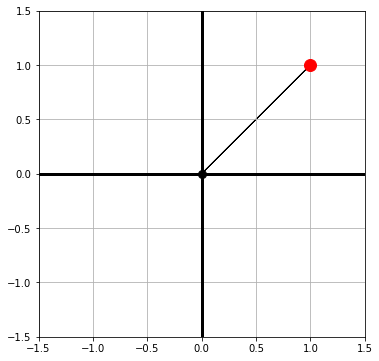

In [51]:
#
plt.figure(figsize=(8,8))
plt.close()
plt.figure(figsize=(6,6))
plt_format_complex()
plt.plot( c.real, c.imag, 'or', markersize=12)
plt.arrow(0, 0, r_sc*np.cos(ang_sc), r_sc*np.sin(ang_sc))
plt.show()

Ejemplo $c=-1-j$

[-1.-1.j]
[1.41421356] [-2.35619449]
[1.41421356] [0.78539816]


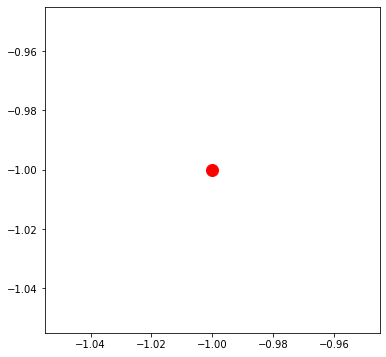

In [52]:
c = np.array( [-1-1j] )
plt.figure(figsize=(6, 6))
plt.plot( c.real, c.imag, 'or', markersize=12)
print(c)
print(np.absolute(c), np.angle(c))
print(np.sqrt( c.real**2+c.imag**2 ), np.arctan( c.imag/c.real ))

## Producto de los n√∫meros complejos

Sean $c_{0} = -.2 + j$y $c_{1}=1-0.5j$. ¬øCu√°l es el valor de $c_{0}(c_{1})$?

[-0.2+1.j], [1.-0.5j]


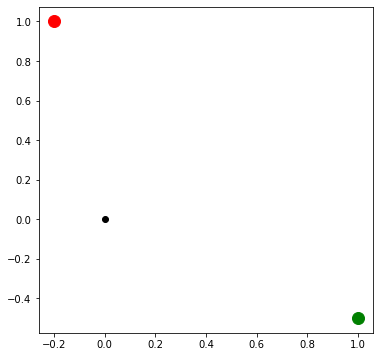

In [53]:
c0 = np.array( [-0.2 + 1.0j] )
c1 = np.array( [ 1.0 - 0.5j] )

print ('%s, %s'%(c0, c1))
plt.figure(figsize=(6, 6))
plt.plot( c0.real, c0.imag, 'or', markersize=12)
plt.plot( c1.real, c1.imag, 'og', markersize=12)

#view
plt.plot( 0,0, 'ok', markersize=6)

[-0.2+1.j], [1.-0.5j]


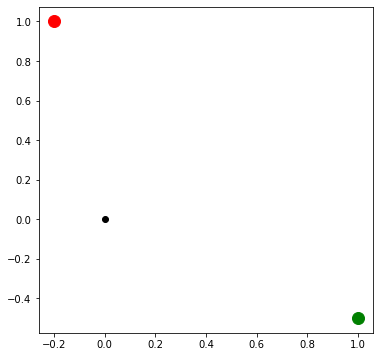

In [54]:
print ('%s, %s'%(c0, c1))
plt.figure(figsize=(6, 6))
plt.plot( c0.real, c0.imag, 'or', markersize=12)
plt.plot( c1.real, c1.imag, 'og', markersize=12)

#view
plt.plot( 0,0, 'ok', markersize=6)

Soluci√≥n algebraica:
$$(-0.2+j) (1-0.5j)= -0.2 (1-0.5j) + j(1-0.5j)$$
$$                 = -0.2 + 0.1j + j +0.5$$
$$                 = \color{red}{-0.2 + 0.5} +\color{blue} {j + 0.1j}$$
$$                 = \color{red}{0.3} + \color{blue}{ 1.1j}$$

[-0.2+1.j]
[1.-0.5j]
[0.3+1.1j]


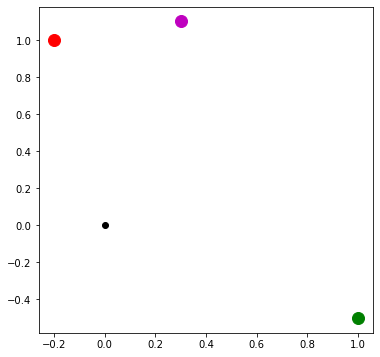

In [55]:
c = c0*c1
plt.figure(figsize=(6, 6))
print ('%s\n%s\n%s'%(c0, c1, c))
plt.plot(  c.real, c.imag, 'om', markersize=12)
plt.plot( c0.real, c0.imag, 'or', markersize=12)
plt.plot( c1.real, c1.imag, 'og', markersize=12)

#view
plt.plot( 0,0, 'ok', markersize=6)

c0: 1.0198/_1.7682
c1: 1.1180/_-0.4636
c : 1.1402/_1.3045


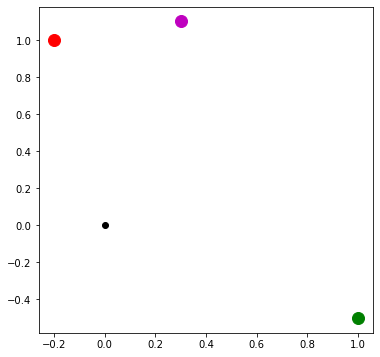

In [56]:
c = c0*c1
plt.figure(figsize=(6, 6))
print ('c0: %2.4f/_%2.4f'%( np.absolute(c0), np.angle(c0) ))
print ('c1: %2.4f/_%2.4f'%( np.absolute(c1), np.angle(c1) ))
print ('c : %2.4f/_%2.4f'%( np.absolute(c ), np.angle(c ) ))

plt.plot(  c.real, c.imag, 'om', markersize=12)
plt.plot( c0.real, c0.imag, 'or', markersize=12)
plt.plot( c1.real, c1.imag, 'og', markersize=12)

#view
plt.plot( 0,0, 'ok', markersize=6)

**Problema.** Sea $c_{0} = -1 + 2.1j$ y $c_{1} = 1.7 + 1.3j$. ¬øCu√°l es el valor de $c_{0}(c_{1})$?

[-1.+2.1j], [1.7+1.3j]
c0: 2.3259/_2.0152
c1: 2.1401/_0.6528
c : 4.9777/_2.6681


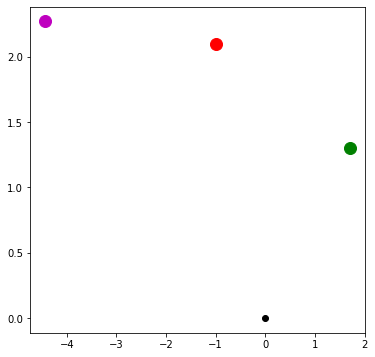

In [57]:
c0 = np.array( [-1.  + 2.1j] )
c1 = np.array( [ 1.7 + 1.3j] )

plt.figure(figsize=(6, 6))
print ('%s, %s'%(c0, c1))

c = c0*c1

print ('c0: %2.4f/_%2.4f'%( np.absolute(c0), np.angle(c0) ))
print ('c1: %2.4f/_%2.4f'%( np.absolute(c1), np.angle(c1) ))
print ('c : %2.4f/_%2.4f'%( np.absolute(c ), np.angle(c ) ))

plt.plot(  c.real, c.imag, 'om', markersize=12)
plt.plot( c0.real, c0.imag, 'or', markersize=12)
plt.plot( c1.real, c1.imag, 'og', markersize=12)

#view
plt.plot( 0,0, 'ok', markersize=6)

**Conclusi√≥n.** Sean $A < \alpha$ y $B < \beta$ las representaciones en coordenadas polares de la n√∫meros $a, b \in \mathbb C$ el producto $e = ab$ est√° dado por

$$E < \eta : E = A + b, \eta = \alpha + \beta$$

En otras palabras, el producto entre n√∫meros complejos afecta la magnitud y la fase. **Este resultado es de vital importancia en el dise√±o de filtros.**

## Identidad de Euler n√∫meros complejos
El n√∫mero $e$ es una constante irracional que se obtiene cuando $n$ de inter√©s compuesto tiende a infinito

$$e = {\lim_{n\to \infty}} \left(1 + \dfrac{1}{n}\right)^{n} $$

In [58]:
n       = 20000000.
e_aprox = (1+1/n)**n

print (np.exp(1), e_aprox)

2.718281828459045 2.7182817560533206


De la definici√≥n del n√∫mero $e$ se obtiene que la funci√≥n $f(x) = e^{x}$ se define como

$$e = {\lim_{m\to \infty}}{\left(1 + \dfrac{x}{m}\right)}^{m}$$

In [59]:
m    = 10000000.
x    = np.pi
e_pi = ( 1 + x/m)**m

print (np.exp( x ), e_pi)

23.140692632779267 23.14068119246507


en general se puede definir la funci√≥n $f(x) = e^{x}$ para $x \in \mathbb C$.

Por ejemplo $e^{j \pi}$ :
$$e^{j \pi} = {\lim_{m\to \infty}}{\left(1 + \dfrac{j \pi}{m}\right)}$$

In [60]:
m     = 1000000.
x     = 1j*np.pi
e_jpi = (1+x/m)**m

print (np.exp( x ), e_jpi)

(-1+1.2246467991473532e-16j) (-1.0000049347314757+1.0335461647996648e-11j)


$e^{j \pi} = -1$, a esto se le conoce como la identidad de Euler

En general se puede escribir $e^{j \pi \omega} = -1$, a esto se le conoce como la identidad de Euler

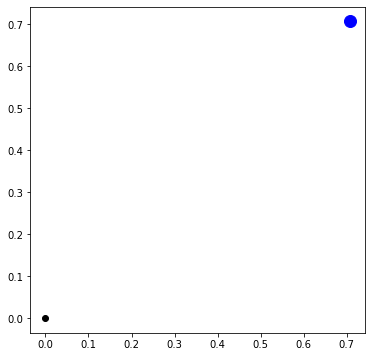

In [61]:
w = 0.25
c = np.exp( w*x )
plt.figure(figsize=(6, 6))
plt.plot(  c.real, c.imag, 'ob', markersize=12)

#view
plt.plot( 0,0, 'ok', markersize=6)

In [62]:
w = np.linspace(0, 2*np.pi, 50)
#w = np.linspace(0, 20, 21)
print (w)

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]


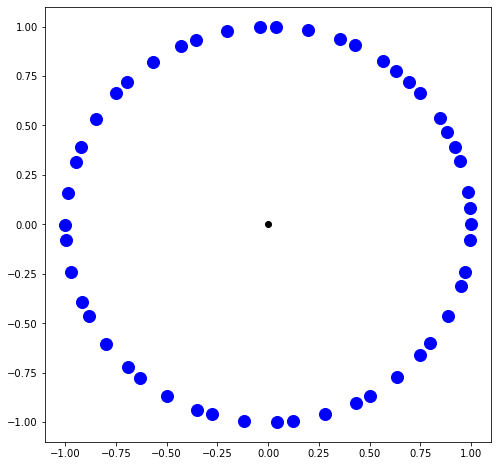

In [63]:
c = np.exp( w*x )

plt.figure(figsize=(8,8))
plt.plot(  c.real, c.imag, 'ob', markersize=12)

#view
plt.plot( 0,0, 'ok', markersize=6)

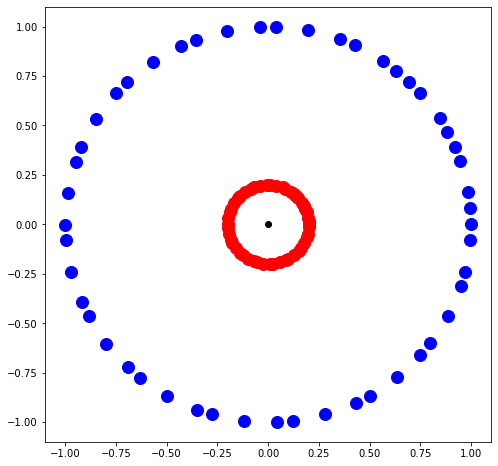

In [64]:
a = .2

c  =   np.exp( w*x )
ca = a*np.exp( w*x )

plt.figure(figsize=(8,8))
plt.plot(  c .real, c .imag, 'ob', markersize=12)
plt.plot(  ca.real, ca.imag, 'or', markersize=12)

#view
plt.plot( 0,0, 'ok', markersize=6)

**Conclusi√≥n** Una forma alternativa de representar n√∫mero complejo $c = r< \theta$ es

$$c=re^{j \theta}$$

**Ejemplo**: Retomando $c^{0} = -0.2 +j$, al hacer la transformaci√≥n a coordenadas polares:
$c_{0} = 1.0198<1.7682 \Rightarrow c_{0} = 1.0198 e^{j 1.7682}$

In [65]:
c0         = np.array( [-0.2 + 1.0j] )
c0_r, c0_a = np.absolute(c0),np.angle(c0)

print ('%s'%(c0))
print ('%2.4f/_%2.4f'%( c0_r, c0_a ))

[-0.2+1.j]
1.0198/_1.7682


[-0.2+1.j]
1.0198/_1.7682


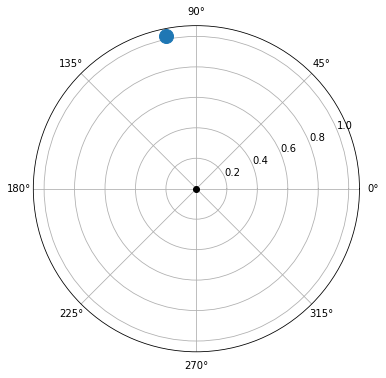

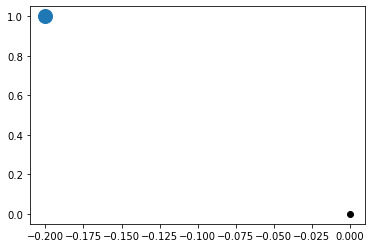

In [66]:
c0         = np.array( [-0.2 + 1.0j] )
c0_r, c0_a = np.absolute(c0),np.angle(c0)

print ('%s'%(c0))
print ('%2.4f/_%2.4f'%( c0_r, c0_a ))

plt.figure(figsize=(6, 6))
plt.polar( c0_a,c0_r,'o', markersize=14)
plt.polar( 0,0, 'ok', markersize=6)

plt.figure()
plt.plot(  c0.real, c0.imag,'o',markersize=14)

#view
plt.plot( 0,0, 'ok', markersize=6)

In [67]:
c0_exp = c0_r*np.exp( 1j*c0_a )

print ('%s'%(c0))
print ('%s'%(c0_exp))
print ('%2.4f/_%2.4f'%( c0_r, c0_a ))

[-0.2+1.j]
[-0.2+1.j]
1.0198/_1.7682


---


# Transformada Z <a class="anchor" id="TZ"></a>


La transformada Z es una herramienta matem√°tica utilizada en el an√°lisis de se√±ales discretas, especialmente en el campo de los sistemas y se√±ales digitales.

La transformada Z toma una secuencia de valores discretos en el tiempo, denotada como ${x[n]}$, y la transforma en una funci√≥n compleja de una variable compleja z. La variable z se expresa en t√©rminos de su magnitud (m√≥dulo) y su √°ngulo de fase. La transformada Z se define mediante la siguiente f√≥rmula:

$X(z) = ‚àë(x[n] * z^{-n}$, donde la suma se toma sobre todos los valores de n en el rango de menos infinito a m√°s infinito.

En esta parte usaremos la funci√≥n <code>**scipy.signal.czt(x, m=None, w=None, a=1 + 0j, *, axis=-1)**</code> en la biblioteca **SciPy** calcula la respuesta de frecuencia alrededor de una espiral en el plano Z.

Par√°metros:

**x**: array. La se√±al a transformar.
<br>**m**: int, opcional. El n√∫mero de puntos de salida deseado. El valor predeterminado es la longitud de los datos de entrada.
<br>**w**: complex, opcional. La proporci√≥n entre puntos en cada paso. Esto debe ser preciso, de lo contrario, el error acumulado degradar√° la parte final de la secuencia de salida. Por defecto, se utilizan puntos igualmente espaciados alrededor de todo el c√≠rculo unitario.
<br>**a**: complex, opcional. El punto de inicio en el plano complejo. El valor predeterminado es 1+0j.
<br>**axis**: int, opcional. Eje a lo largo del cual se calcula la transformada. Si no se proporciona, se utiliza el √∫ltimo eje.

In [68]:
import scipy.signal as signal

In [69]:
# Definir la se√±al discreta
x = np.array([1, 2, 3, 4, 5])

# Calcular la Transformada Z con CZT
z_transform = signal.czt(x)

# Imprimir la Transformada Z
print(z_transform)

AttributeError: module 'scipy.signal' has no attribute 'czt'

---


# Fourier <a class="anchor" id="F"></a>

La serie de Fourier es una representaci√≥n matem√°tica que permite descomponer una funci√≥n peri√≥dica en una suma infinita de funciones senoidales (o cosenoidales) con diferentes frecuencias y amplitudes. Es una herramienta fundamental en el an√°lisis de se√±ales y sistemas, y tiene aplicaciones en diversas √°reas como la f√≠sica, las matem√°ticas, la ingenier√≠a y la m√∫sica.
se represeenta con la formula 
$$\LARGE f(x) = \dfrac{a_{0}}{2}  + \sum [a_{n}\cos(nx) + b_{n}\sin(nx)]$$

Para calcular la serie de Fourier y mostrar el espectro de amplitud y fase

1. Definimos una se√±al peri√≥dica $x(t)$.
<br> En este caso, la se√±al $x(t)$ es la suma de tres componentes sinusoidales con diferentes frecuencias y amplitudes.

In [ ]:
def x(t):
    return np.cos(2*np.pi*2*t) + 0.5*np.sin(2*np.pi*5*t) + 0.3*np.cos(2*np.pi*10*t)

2. Es importante configurar los par√°metros adecuados para el c√°lculo de la serie de Fourier. Estos incluyen el per√≠odo de la se√±al **T** y el n√∫mero de puntos de muestreo **N**. Puedes ajustar estos valores seg√∫n tus necesidades.

In [ ]:
T = 2*np.pi  # Per√≠odo de la se√±al
N = 50  # N√∫mero de puntos de muestreo
n_coefficients = 20  # N√∫mero de coeficientes de Fourier

3. La l√≠nea de c√≥digo from <code>**scipy.fft import fft, fftfreq</code> importa las funciones <code>fft</code> y <code>fftfreq</code>** del m√≥dulo **fft** de la biblioteca SciPy. Estas funciones se utilizan para realizar transformadas de Fourier r√°pidas (FFT) y calcular las frecuencias correspondientes.

* La funci√≥n **fft** se utiliza para calcular la transformada r√°pida de Fourier de una se√±al. Toma como entrada una secuencia de valores de se√±al y devuelve la transformada de Fourier de esa se√±al.

* La funci√≥n **fftfreq** se utiliza para generar una matriz de frecuencias correspondientes a las componentes de la FFT. Esta funci√≥n toma como entrada la longitud de la se√±al y el intervalo de muestreo y devuelve una matriz de frecuencias en el dominio de la frecuencia para cada punto de la se√±al transformada.

<br> El resultado de **X** ser√° un arreglo que contiene los coeficientes de Fourier de la se√±al.

In [ ]:
from scipy.fft import fft, fftfreq
# Generar el vector de tiempo
t = np.linspace(0, T, N)

# Calcular la serie de Fourier mediante la transformada r√°pida de Fourier (FFT)
X = fft(x(t))/N

4. A partir de los coeficientes de Fourier, podemos calcular el espectro de amplitud y fase correspondiente a cada frecuencia. Para ello, utilizaremos las funciones <code>**.abs**</code> y <code>**.angle**</code> de **numpy** para obtener la magnitud y fase de cada coeficiente respectivamente.

In [ ]:
X_magnitude = np.abs(X)  # Espectro de amplitud
X_phase = np.angle(X)  # Espectro de fase

5. Para visualizar correctamente el espectro, necesitamos configurar las frecuencias correspondientes a los coeficientes de Fourier. Esto se puede hacer utilizando la funci√≥n <code>**fftfreq**</code> de numpy

In [ ]:
frequencies = fftfreq(N, d=T/N)

6. Finalmente, utilizaremos **matplotlib** para graficar el espectro de amplitud y fase.

In [ ]:
# Graficar el espectro de amplitud
plt.figure(figsize=(8, 6))
plt.stem(frequencies, X_magnitude)
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Espectro de Amplitud')
plt.grid(True)
plt.show()

# Graficar el espectro de fase
plt.figure(figsize=(8, 6))
plt.stem(frequencies, X_phase)
plt.xlabel('Frecuencia')
plt.ylabel('Fase')
plt.title('Espectro de Fase')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la se√±al x(t)
def x(t):
    return np.cos(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

# Par√°metros de la se√±al y la transformada de Fourier
T = 1.0  # Duraci√≥n de la se√±al en segundos
fs = 50  # Tasa de muestreo en Hz
N = int(T * fs)  # N√∫mero de puntos de muestreo

# Generar el vector de tiempo
t = np.linspace(0, T, N, endpoint=False)

# Calcular la serie de Fourier mediante la transformada de Fourier
X = np.fft.fft(x(t))
X_magnitude = np.abs(X)  # Espectro de amplitud
X_phase = np.angle(X)  # Espectro de fase

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(N, d=1/fs)

# Graficar el espectro de amplitud
plt.figure(figsize=(8, 6))
plt.stem(frequencies, X_magnitude)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title('Espectro de Amplitud')
plt.grid(True)
plt.show()

# Graficar el espectro de fase
plt.figure(figsize=(8, 6))
plt.stem(frequencies, X_phase)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [radianes]')
plt.title('Espectro de Fase')
plt.grid(True)
plt.show()

---


# La Transformada de Fourier <a class="anchor" id="ltf"></a>
Es una herramienta matem√°tica importante para analizar se√±ales en dominio de frecuencia. Permite descomponer una se√±al en sus componentes frecuenciales y obtener informaci√≥n sobre las amplitudes y fases de esas componentes.

1. Se define la se√±al en el dominio del tiempo. En este caso, se utiliza un vector de tiempo t creado con <code>**np.linspace()**</code>, que va de 0 a 1 con 1000 puntos equidistantes. A continuaci√≥n, se definen los par√°metros de la se√±al, como la frecuencia y la amplitud. En este ejemplo, se utiliza una se√±al sinusoidal con una frecuencia de 10 Hz y una amplitud de 1. La se√±al se calcula utilizando la funci√≥n <code>**np.sin()**</code> de NumPy.

In [ ]:
# Definir la se√±al en dominio del tiempo
t = np.linspace(0, 1, 1000)  # Vector de tiempo
frecuencia = 10  # Frecuencia de la se√±al
amplitud = 1  # Amplitud de la se√±al
se√±al = amplitud * np.sin(2 * np.pi * frecuencia * t)  # Se√±al sinusoidal

2. Se utiliza la funci√≥n <code>**np.fft.fft()**</code> para calcular la Transformada de Fourier de la se√±al. Esta funci√≥n toma como argumento la se√±al y devuelve un vector que representa los coeficientes complejos de la Transformada de Fourier. El vector resultante se almacena en la variable **transformada**.

In [ ]:
# Calcular la Transformada de Fourier
transformada = np.fft.fft(se√±al)

3. Aqu√≠, se obtiene el espectro de amplitud tomando el valor absoluto de los coeficientes de la Transformada de Fourier. Esto se hace utilizando la funci√≥n <code>**np.abs()**</code> de NumPy. El espectro de amplitud resultante se almacena en la variable **espectro_amplitud**.

In [ ]:
# Obtener el espectro de amplitud
espectro_amplitud = np.abs(transformada)

 4. Se utiliza la funci√≥n <code>**np.fft.fftfreq()**</code> para obtener las frecuencias correspondientes a los coeficientes de la Transformada de Fourier. Esta funci√≥n toma como argumentos la longitud de la se√±al **(len(t))** y el intervalo de tiempo entre las muestras **(d=t[1]-t[0])**. Devuelve un vector de frecuencias que se almacena en la variable **frecuencias**.

In [ ]:
# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(len(t), d=t[1]-t[0])

5. Por ultimo, se grafica el espectro de amplitud

In [ ]:
# Graficar el espectro de amplitud
plt.plot(frecuencias, espectro_amplitud)
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Espectro de Amplitud')
plt.grid(True)
plt.show()

## Funci√≥n de transferecia<a class="anchor" id="fT"></a>

La funci√≥n de transferencia es una herramienta fundamental en el an√°lisis de sistemas lineales e invariantes en el tiempo. En el contexto de la teor√≠a de control y procesamiento de se√±ales, la funci√≥n de transferencia describe la relaci√≥n entre la entrada y la salida de un sistema en el dominio de la frecuencia.

En t√©rminos generales, la funci√≥n de transferencia se define como la transformada de Laplace de la respuesta en r√©gimen estable de un sistema, considerando las condiciones iniciales nulas. Se utiliza principalmente en el dominio de la frecuencia para analizar c√≥mo un sistema afecta diferentes componentes de frecuencia de una se√±al de entrada.

1. Definimos la funci√≥n de transferencia utilizando <code>**signal.TransferFunction()**</code>. Los coeficientes del numerador se especifican en la lista **num**, mientras que los coeficientes del denominador se especifican en la lista **den**. En este ejemplo, se crea una funci√≥n de transferencia con coeficientes $ [1] $ para el numerador y $[1, 2, 1]$ para el denominador.

In [ ]:
# Definir la funci√≥n de transferencia
num = [1]
den = [1, 2, 1]
tf = signal.TransferFunction(num, den)

2.  Generamos una se√±al de entrada u que ser√° utilizada para obtener la respuesta del sistema en el dominio del tiempo. En este caso, se crea una se√±al sinusoidal utilizando <code>**numpy.sin()**</code> que var√≠a en el tiempo t, generado mediante <code>**np.linspace()**</code> que va de 0 a 10 con 1000 puntos equidistantes.

In [ ]:
# Generar una se√±al de entrada
t = np.linspace(0, 10, 1000)
u = np.sin(t)

3. Utilizamos <code>**signal.lsim()**</code> para calcular la respuesta en el dominio del tiempo del sistema representado por la funci√≥n de transferencia tf. Esta funci√≥n toma como argumentos la funci√≥n de transferencia, la se√±al de entrada y el vector de tiempo. Devuelve tres arrays: **t** (el vector de tiempo actualizado), **y** (la respuesta del sistema)

La funci√≥n <code>**signal.lsim()**</code> es una funci√≥n de la biblioteca scipy.signal de Python que se utiliza para calcular la respuesta de un sistema lineal e invariante en el tiempo en el dominio del tiempo.

La sintaxis b√°sica de <code>signal.lsim()</code> es la siguiente:

<code>t, y, x = signal.lsim(system, u, t, X0=None)</code>
Donde:

**system**: Especifica el sistema representado por una funci√≥n de transferencia, una matriz de espacio de estados o un objeto de respuesta impulso.
<br>**u**: Es la se√±al de entrada al sistema. Puede ser un vector o una matriz que representa una se√±al unidimensional o multidimensional respectivamente.
<br>**t**: Es el vector de tiempo en el cual se calcula la respuesta del sistema.
<br> **X0** (opcional): Es el estado inicial del sistema. Por defecto es None, lo que significa que se asume que el sistema est√° inicialmente en reposo.

La funci√≥n <code>**signal.lsim()**</code> devuelve tres arrays:

**t**: El vector de tiempo en el cual se calcula la respuesta del sistema. Puede ser el mismo vector de tiempo proporcionado como entrada o puede ser modificado internamente por la funci√≥n.
<br>**y**: La respuesta del sistema en el dominio del tiempo. Es un array que contiene los valores de la salida del sistema en cada instante de tiempo.
<br>**x**: El estado del sistema en el dominio del tiempo. Es un array que contiene los valores del estado del sistema en cada instante de tiempo.


In [ ]:
# Calcular la respuesta en el dominio del tiempo
t, y, _ = signal.lsim(tf, u, t)

4. Grafico

In [ ]:
# Graficar la respuesta en el dominio del tiempo
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.title('Respuesta en el dominio del tiempo')
plt.grid(True)
plt.show()

# Tablas <a class="anchor" id="T"></a>

#### Tabla de Propiedades Principales de la Transformada de Fourier: 
\begin{array}{|c|c|c|} \hline
Propiedades & Se√±ales \hspace{2mm} Aperiodicas & Transformada \hspace{2mm} de \hspace{2mm} Fourier \\ \hline
Linealidad & A \centerdot x(t)+B \centerdot y(t) & A \centerdot X(jw)+B \centerdot Y(jw) \\ \hline
Desplazamiento \hspace{2mm} en \hspace{2mm} el \hspace{2mm} tiempo  &      x(t-t_0)  &  e^{-jw_{0}t} \centerdot X(jw) \\ \hline
Desplazamiento \hspace{2mm} de \hspace{2mm} frecuencia  & e^{-j{w_{0}}t} x(t) &    X(j(w-w_0))  \\ \hline
Conjugaci√≥n   &  x^{*} (t)  & X^{*}(-jw) \\ \hline
Inversi√≥n \hspace{2mm}del\hspace{2mm} tiempo    & x(-t) & X(-jw) \\ \hline
Escalamiento \hspace{2mm}de \hspace{2mm}tiempo \hspace{2mm}y \hspace{2mm}de \hspace{2mm}Frecuencia  & x(at) & {\dfrac{1}{|a|}}.X{\dfrac{jw}{a}} \\ \hline
Convoluci√≥n   & x(t)*y(t) &     X(jw).Y(jw) \\ \hline
Multiplicaci√≥n & x(t)\centerdot y(t)   &{\dfrac{1}{2œÄ}}X(jw)*Y(jw)\\ \hline
Diferenciaci√≥n \hspace{2mm} en \hspace{2mm}tiempo   & {\dfrac{d_{x}(t)}{dt}}    &jw \centerdot X(jw) \\ \hline
\end{array}

#### Tabla de Propiedades Secundarias de la Transformada de Fourier:

\begin{array}{|c|c|c|} \hline
Propiedades & Se√±ales \hspace{2mm} Aperiodicas & Transformada \hspace{2mm}de \hspace{2mm}Fourier \\ \hline
Integraci√≥n &{\int_{-‚àû}^{t}x(t)dt} &{\dfrac{1}{jw}}{{\centerdot}X(jw)+{œÄ}X(0){Œ¥}(w)} \\ \hline
Diferenciaci√≥n \hspace{2mm}en \hspace{2mm}frecuencia   &tx(t) & j{\dfrac{dX(jw)}{dw}} \\ \hline
Simetr√≠a \hspace{2mm}conjugada\hspace{2mm} para \hspace{2mm}se√±ales\hspace{2mm} reales &x(t) \hspace{2mm} real & X(jw)=X*(jw),  Re[X(jw)]=Re[X(-jw)],  Im[X(jw)]=-Im[X(-jw)],  |X(jw)|=|X(-jw)|,    fase(X(jw))=fase(X(-jw)) \\ \hline
Simetr√≠a\hspace{2mm} para\hspace{2mm} se√±ales\hspace{2mm} real\hspace{2mm} y \hspace{2mm}par    & x(t)\hspace{2mm}real & X(jw)\hspace{2mm} real \hspace{2mm} y \hspace{2mm} par\\ \hline
Simetr√≠a \hspace{2mm} para \hspace{2mm} se√±ales \hspace{2mm} real \hspace{2mm} e \hspace{2mm}impar   & x(t) \hspace{2mm} real \hspace{2mm} e \hspace{2mm} impar  &X(jw) imaginaria \hspace{2mm} pura \hspace{2mm} e \hspace{2mm} impar \\ \hline
Descomposici√≥n \hspace{2mm} par-impar \hspace{2mm}de \hspace{2mm}se√±ales \hspace{2mm} reales & x_e(t)={ùõÜ}v[x(t)],\hspace{2mm}x(t) \hspace{2mm}real, x_0(t)=Od[x(t)],x(t)real    &  Re[X(jw)], jIm[X(jw)]\\ \hline
Relaci√≥n \hspace{2mm} de \hspace{2mm} Parseval    &x(t)   & {\int_{-‚àû}^{+‚àû}|x(t)|^{2}dt}={\dfrac{1}{2œÄ}{\int_{-‚àû}^{+‚àû}|X(jw)|^{2}dw}} \\ \hline
\end{array}

#### Tabla de Pares B√°sicos de Transformadas de Fourier:


\begin{array}{|c|c|c|} \hline
Se√±al &Transformada \hspace{2mm} de \hspace{2mm} Fourier& Coeficientes\hspace{2mm} (si\hspace{2mm}es\hspace{2mm}peri√≥dica)\\ \hline
{\sum_{k=-‚àû}^{+‚àû}a_{k}{\centerdot}e^{jkw_{0}t}} &    {2œÄ}{\sum_{k=-‚àû}^{+‚àû}a_{k}{Œ¥}(w-w_{0})} &     a_{k}\\ \hline
e^{jw_{0}t} & {2œÄ}{Œ¥}(w-w_{0}) & a_{1}=1, \hspace{2mm}  a_{k}=0;{‚àÄ}k{\neq}1 \\ \hline
cos(w_{0}t) & {œÄ}[Œ¥(w-w_{0})+Œ¥(w+w_{0})] & a_{1}=a_{-1}={\dfrac{1}{2j}},
\hspace{2mm} a_{k}=0;{‚àÄ}k{\neq}{\pm}1\\ \hline
sin(w_{0}t) & {\dfrac{œÄ}{j}}[Œ¥(w-w_{0})-Œ¥(w+w_{0})]& a_{1}=a_{-1}={\dfrac{1}{2j}}, a_{k}=0;{‚àÄ}k{\neq}{\pm}1\\ \hline
x(t)=1 & {2œÄ}{Œ¥}(w) & a_{0}=1;a_{k}=0,{‚àÄ}k{\neq}0\\ \hline
Onda \hspace{2mm}cuarada \hspace{2mm}peri√≥dica \hspace{2mm} x(t)=\begin{Bmatrix}
1, \left | t \right |< T_{1}\\ 
0, T_{1}<\left | t \right |\leq \frac{T}{2}
\end{Bmatrix} & {\sum_{k=-‚àû}^{+‚àû} \dfrac {2\sin(k\omega_{0}T_{1})}{k}} \delta(\omega-k\omega_{0}) & \dfrac{\sin(k \omega_{0}T_{1})}{k \pi}\\ \hline
\end{array}

\begin{array}{|c|c|} \hline
Se√±al &Transformada \hspace{2mm} de \hspace{2mm} Fourier\\ \hline
{\delta(t)} &    1 \\ \hline 
u(t)   &{\dfrac{1}{jw}} \\ \hline
{\delta}(t-t_{0})  & e^{-jwt_{0}}\\ \hline
e^{-at}{\centerdot}u(t), {\mathbb{R}}e(a)>0 &{\dfrac{1}{a+jw}}\\ \hline
te^{-at}{\centerdot}u(t), {\mathbb{R}}e(a)>0 & \dfrac{1}{(a+jw)^2} \\ \hline
{\dfrac{t^{n-1}}{(n-1)!}}{\centerdot}e^{-at}{\centerdot}u(t), 
{\mathbb{R}}e(a)>0 & {\dfrac{1}{(a+jw)^n}} \\ \hline
\end{array}